<a href="https://colab.research.google.com/github/Dieljr/pythonDev/blob/master/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chegamos ao fim da análise,  apresentando a criação de modelos preditivos: LOGISTIC REGRESSION, DECISION TREE CLASSIFIER, RANDOM FOREST CLASSIFIER

Source: http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

In [ ]:
# Importar pacotes

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi'] = 400

import seaborn as sb

import numpy as np
import pandas as pd

In [ ]:
# Importa dataset Pima Indians Diabetes
df = pd.read_csv('diabetes.csv', sep = ';'); df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Alterar nomes das colunas (METADADOS)
df.columns = ['PREGANCIES', 'GLUCOSE', 'BLOOD_PRESSURE', 'SKIN', 'INSULIN', 'BMI', 'PEDIGREE', 'AGE', 'OUTCOME']; df

,PREGANCIES,GLUCOSE,BLOOD_PRESSURE,SKIN,INSULIN,BMI,PEDIGREE,AGE,OUTCOME
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.OUTCOME.unique()

# 0 sem diabetes
# 1 com diabetes

array([1, 0], dtype=int64)

In [ ]:
df.shape

(768, 9)

In [ ]:
# Buscar por valores missing com .isnull().sum()
df.isnull().sum()

PREGANCIES        0
GLUCOSE           0
BLOOD_PRESSURE    0
SKIN              0
INSULIN           0
BMI               0
PEDIGREE          0
AGE               0
OUTCOME           0
dtype: int64

In [ ]:
# Buscar por valores missing com .isna().sum()
df.isna().sum()

PREGANCIES        0
GLUCOSE           0
BLOOD_PRESSURE    0
SKIN              0
INSULIN           0
BMI               0
PEDIGREE          0
AGE               0
OUTCOME           0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B8D4668C8>,
      dtype=object)

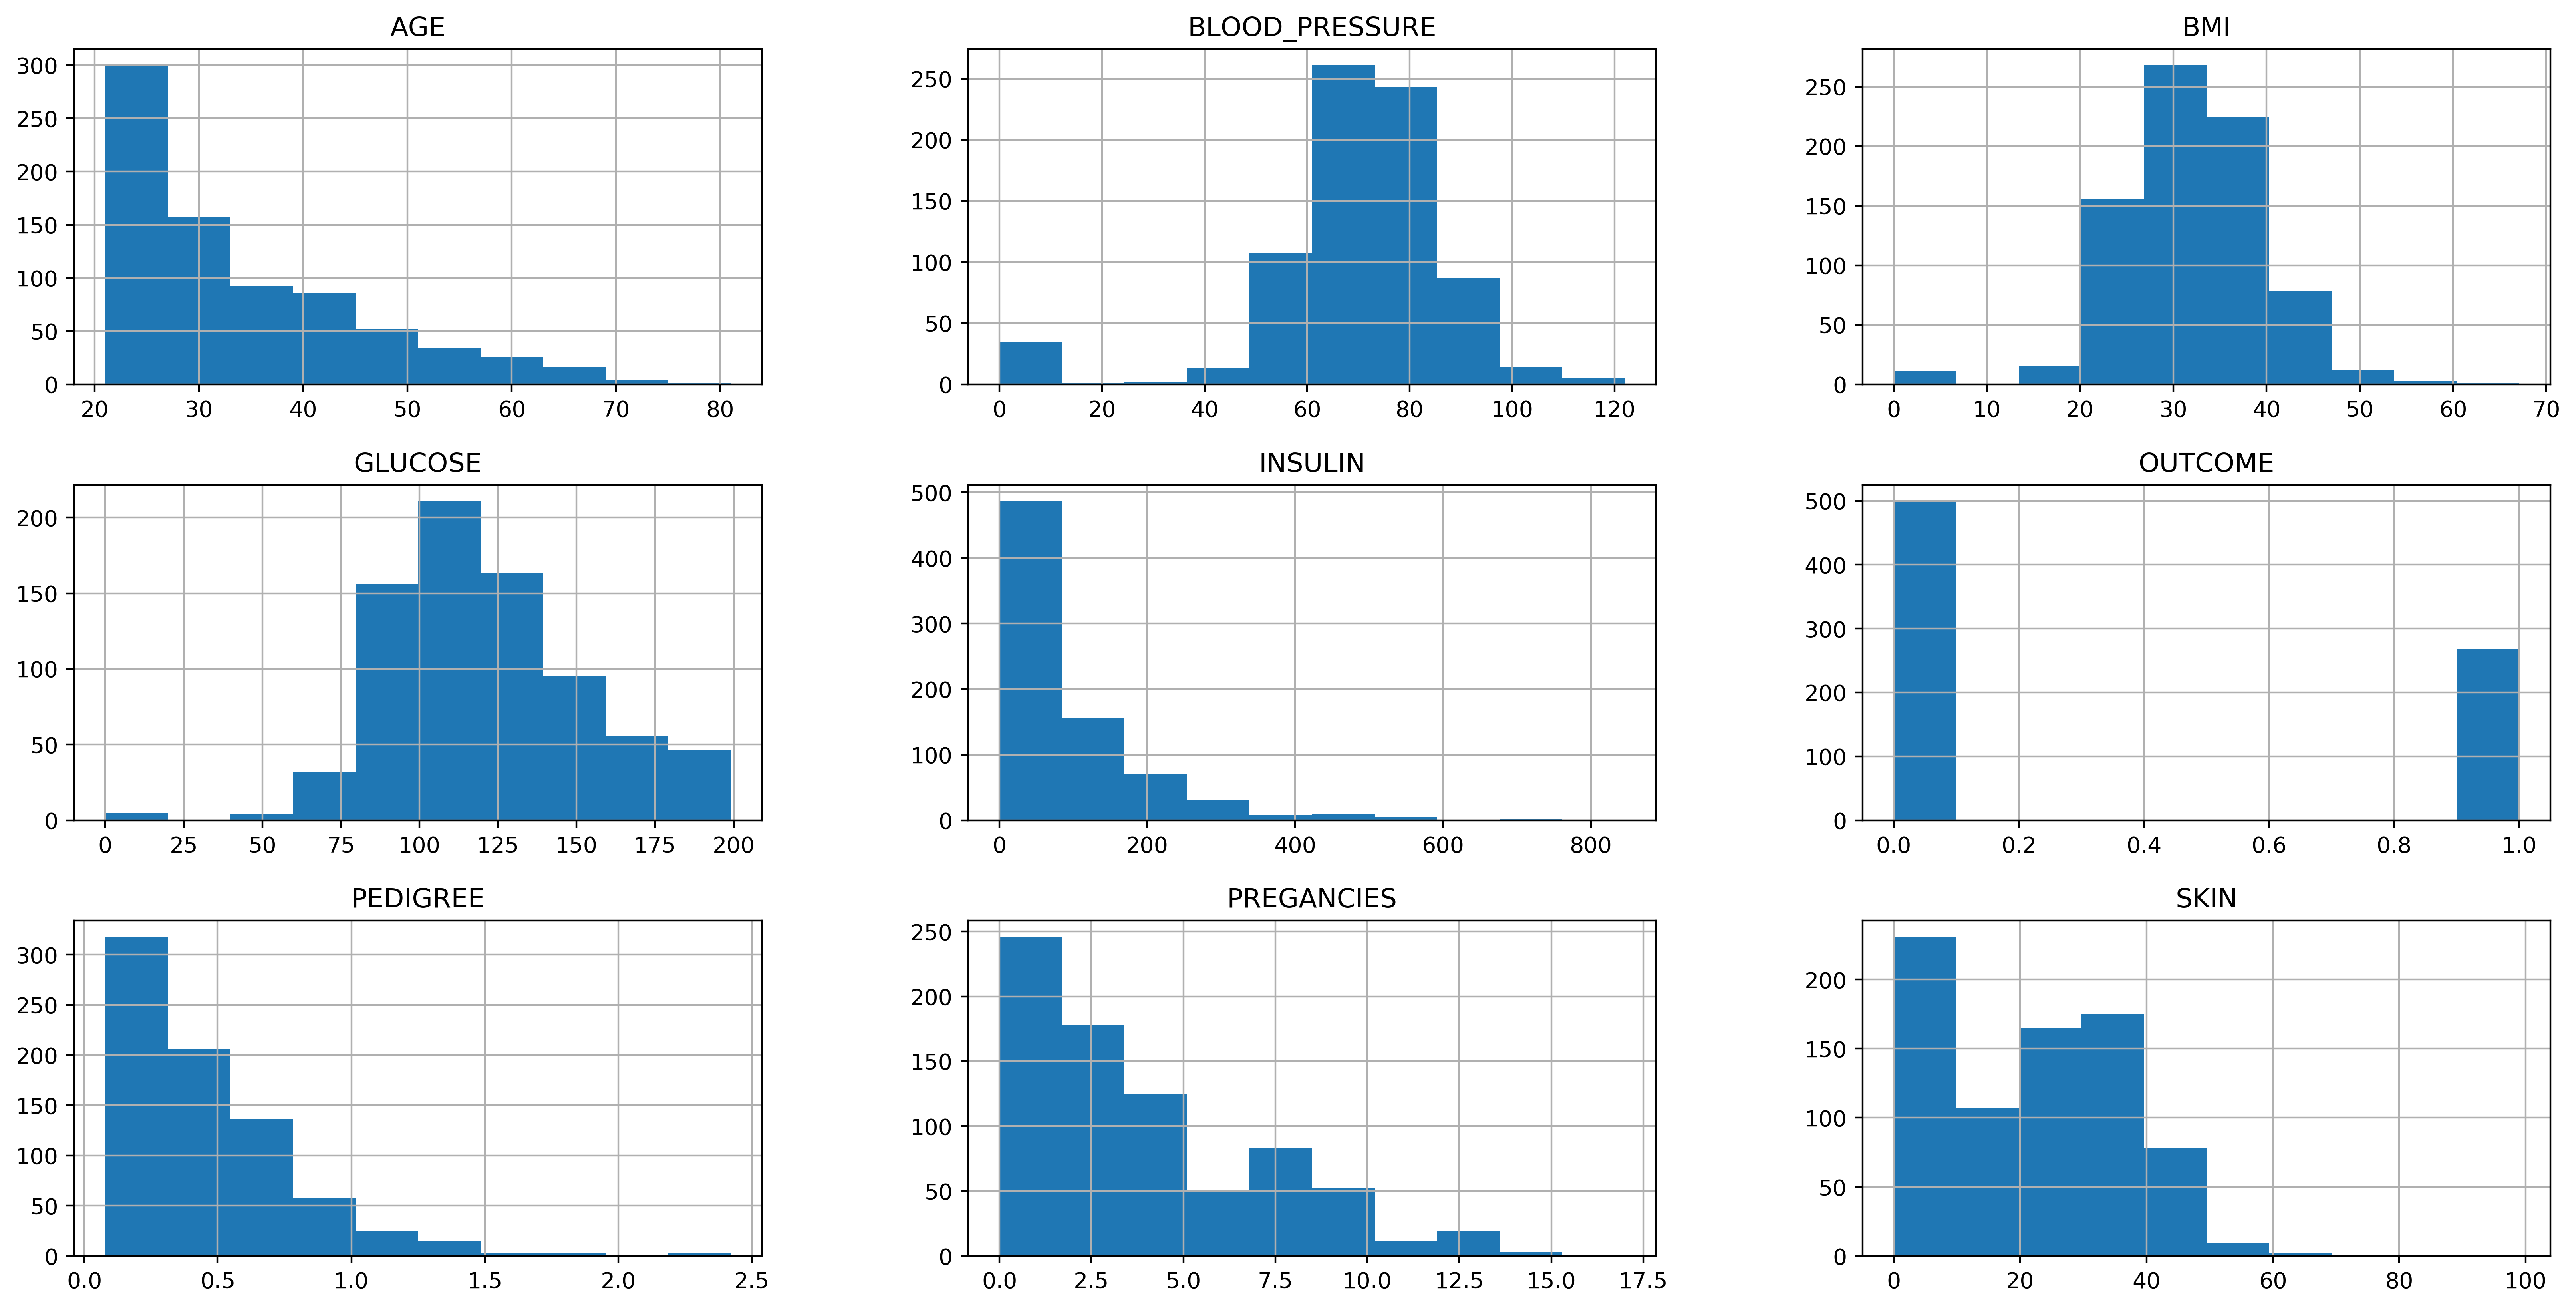

In [ ]:
# Plotar variáveis sem a necessidade de criar código para subplots
# buscar valores iguais a zero. Com excessão das variáveis Pregnancies_month e Outcome

df.hist(figsize = (20,10))

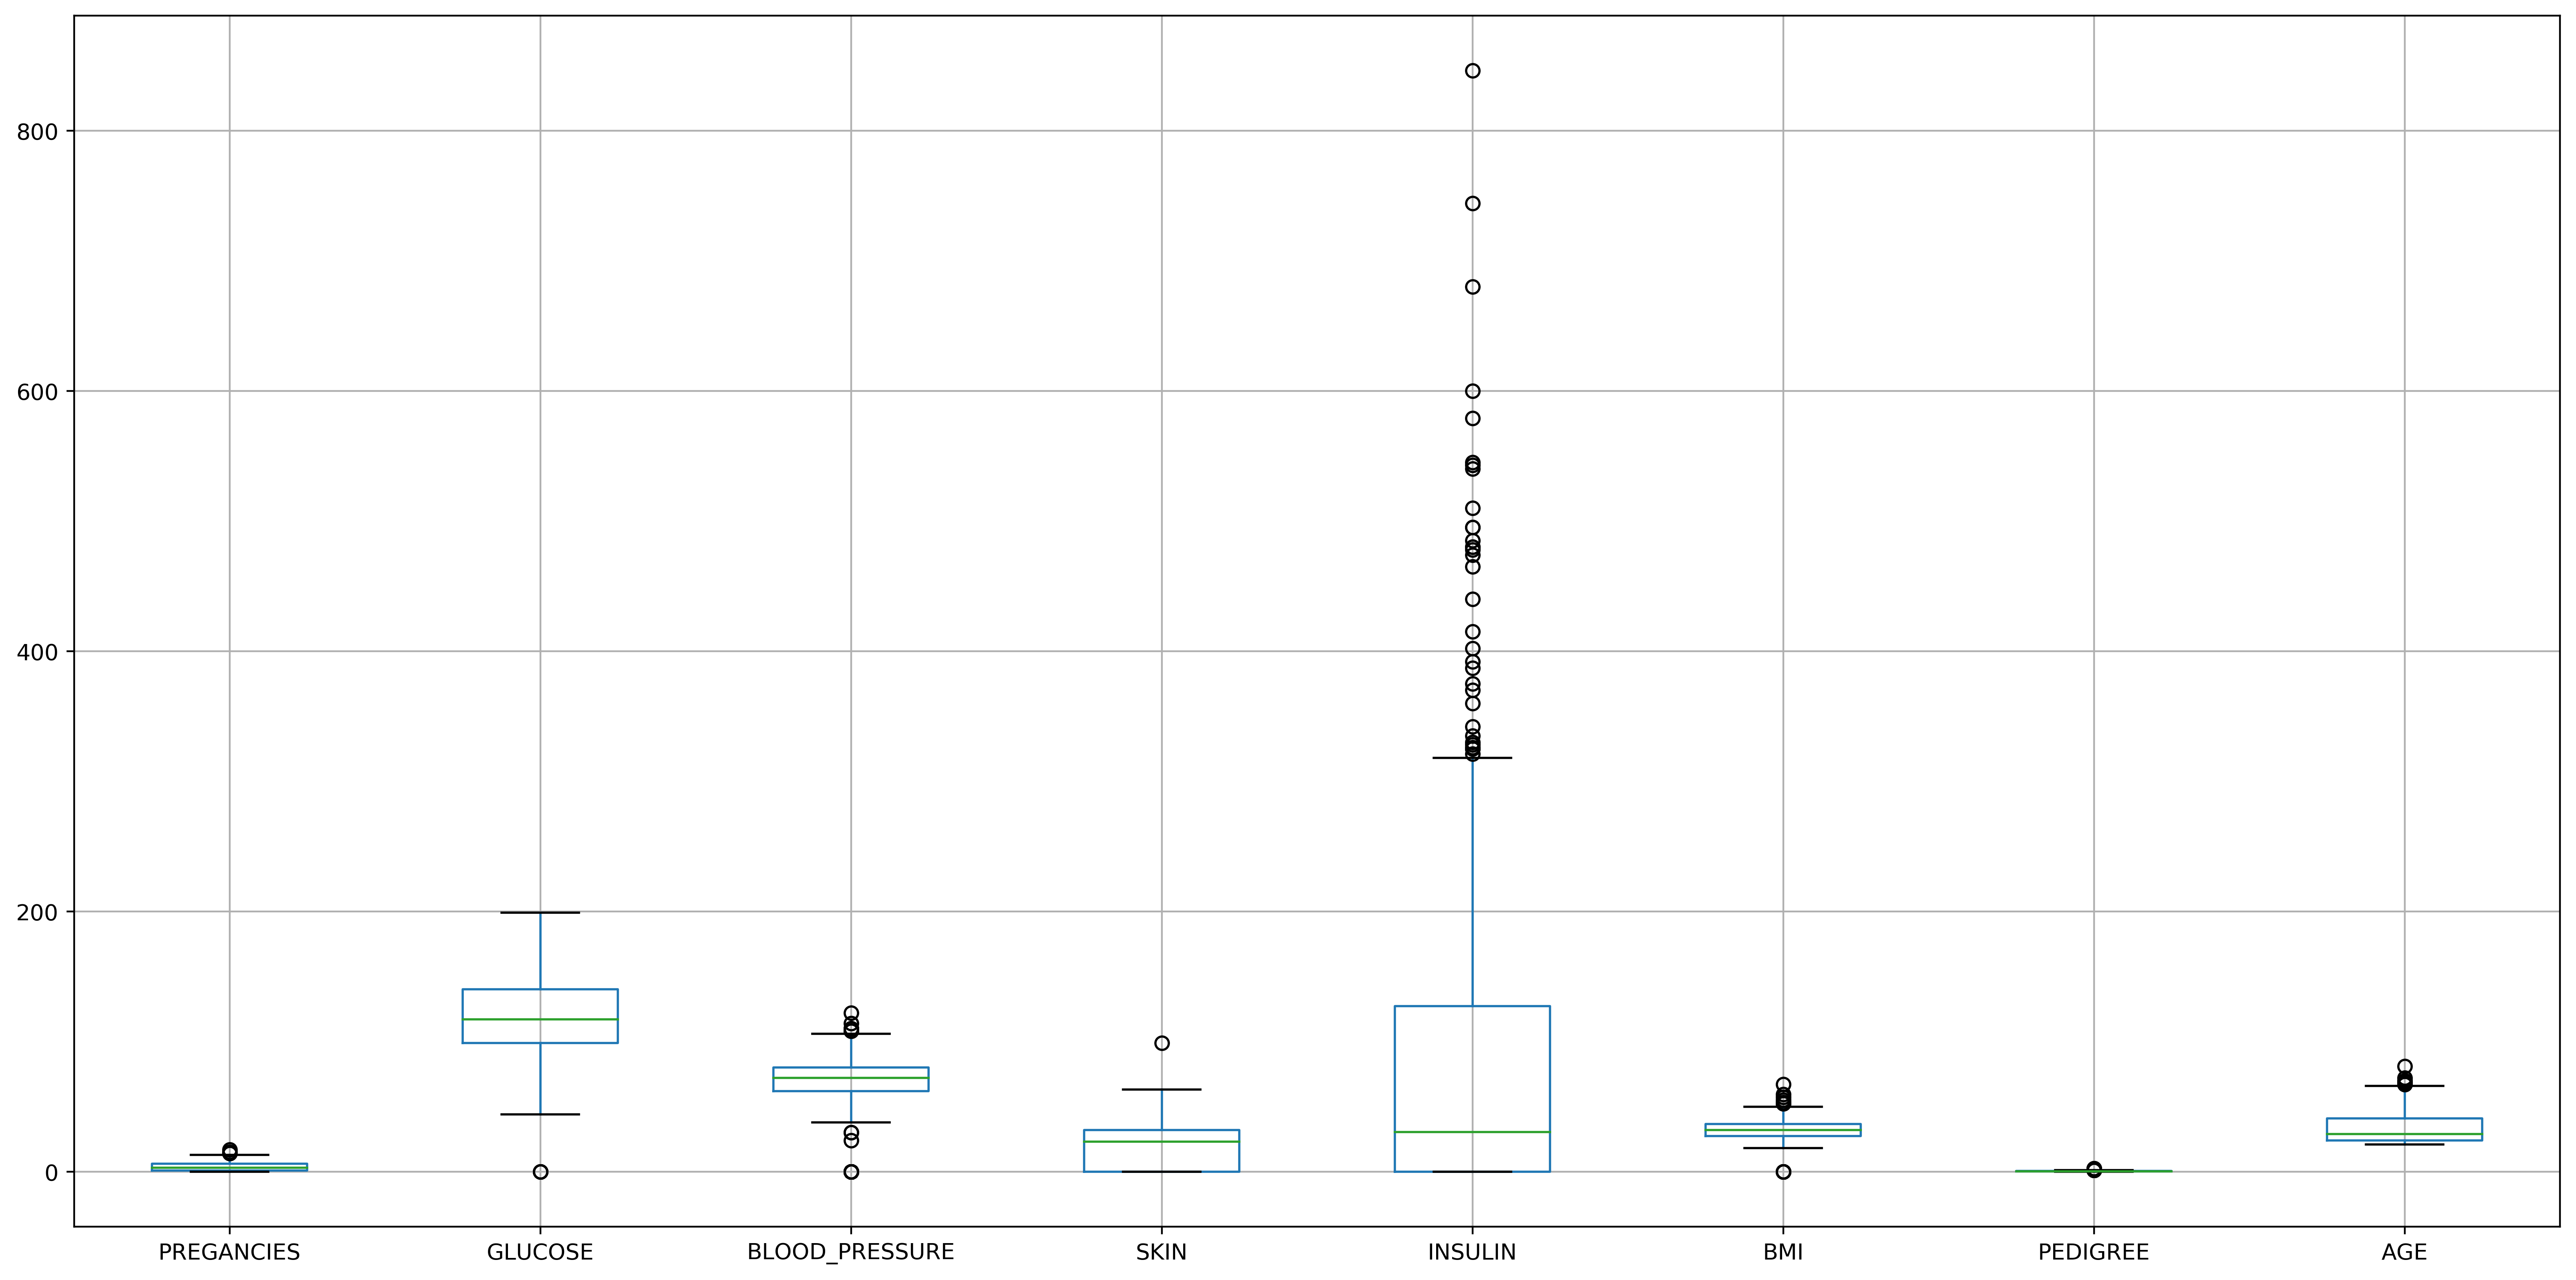

In [ ]:
# verificar quartis e outliers de cada variável, exceto a variável target (outcome)

df.iloc[:,0:8].boxplot(figsize = (20,10))

In [ ]:
print((df[['GLUCOSE', 'BLOOD_PRESSURE', 'SKIN', 'INSULIN', 'BMI']] == 0).sum())

GLUCOSE             5
BLOOD_PRESSURE     35
SKIN              227
INSULIN           374
BMI                11
dtype: int64


In [ ]:
# converte os valores zerados em NaN, porque esses valores não são contabilizados estatisticamente
df[['GLUCOSE', 'BLOOD_PRESSURE', 'SKIN', 'INSULIN', 'BMI']] = df[['GLUCOSE', 'BLOOD_PRESSURE', 'SKIN', 
                                                                  'INSULIN', 'BMI']].replace(0, np.NaN)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B9289D5C8>,
      dtype=object)

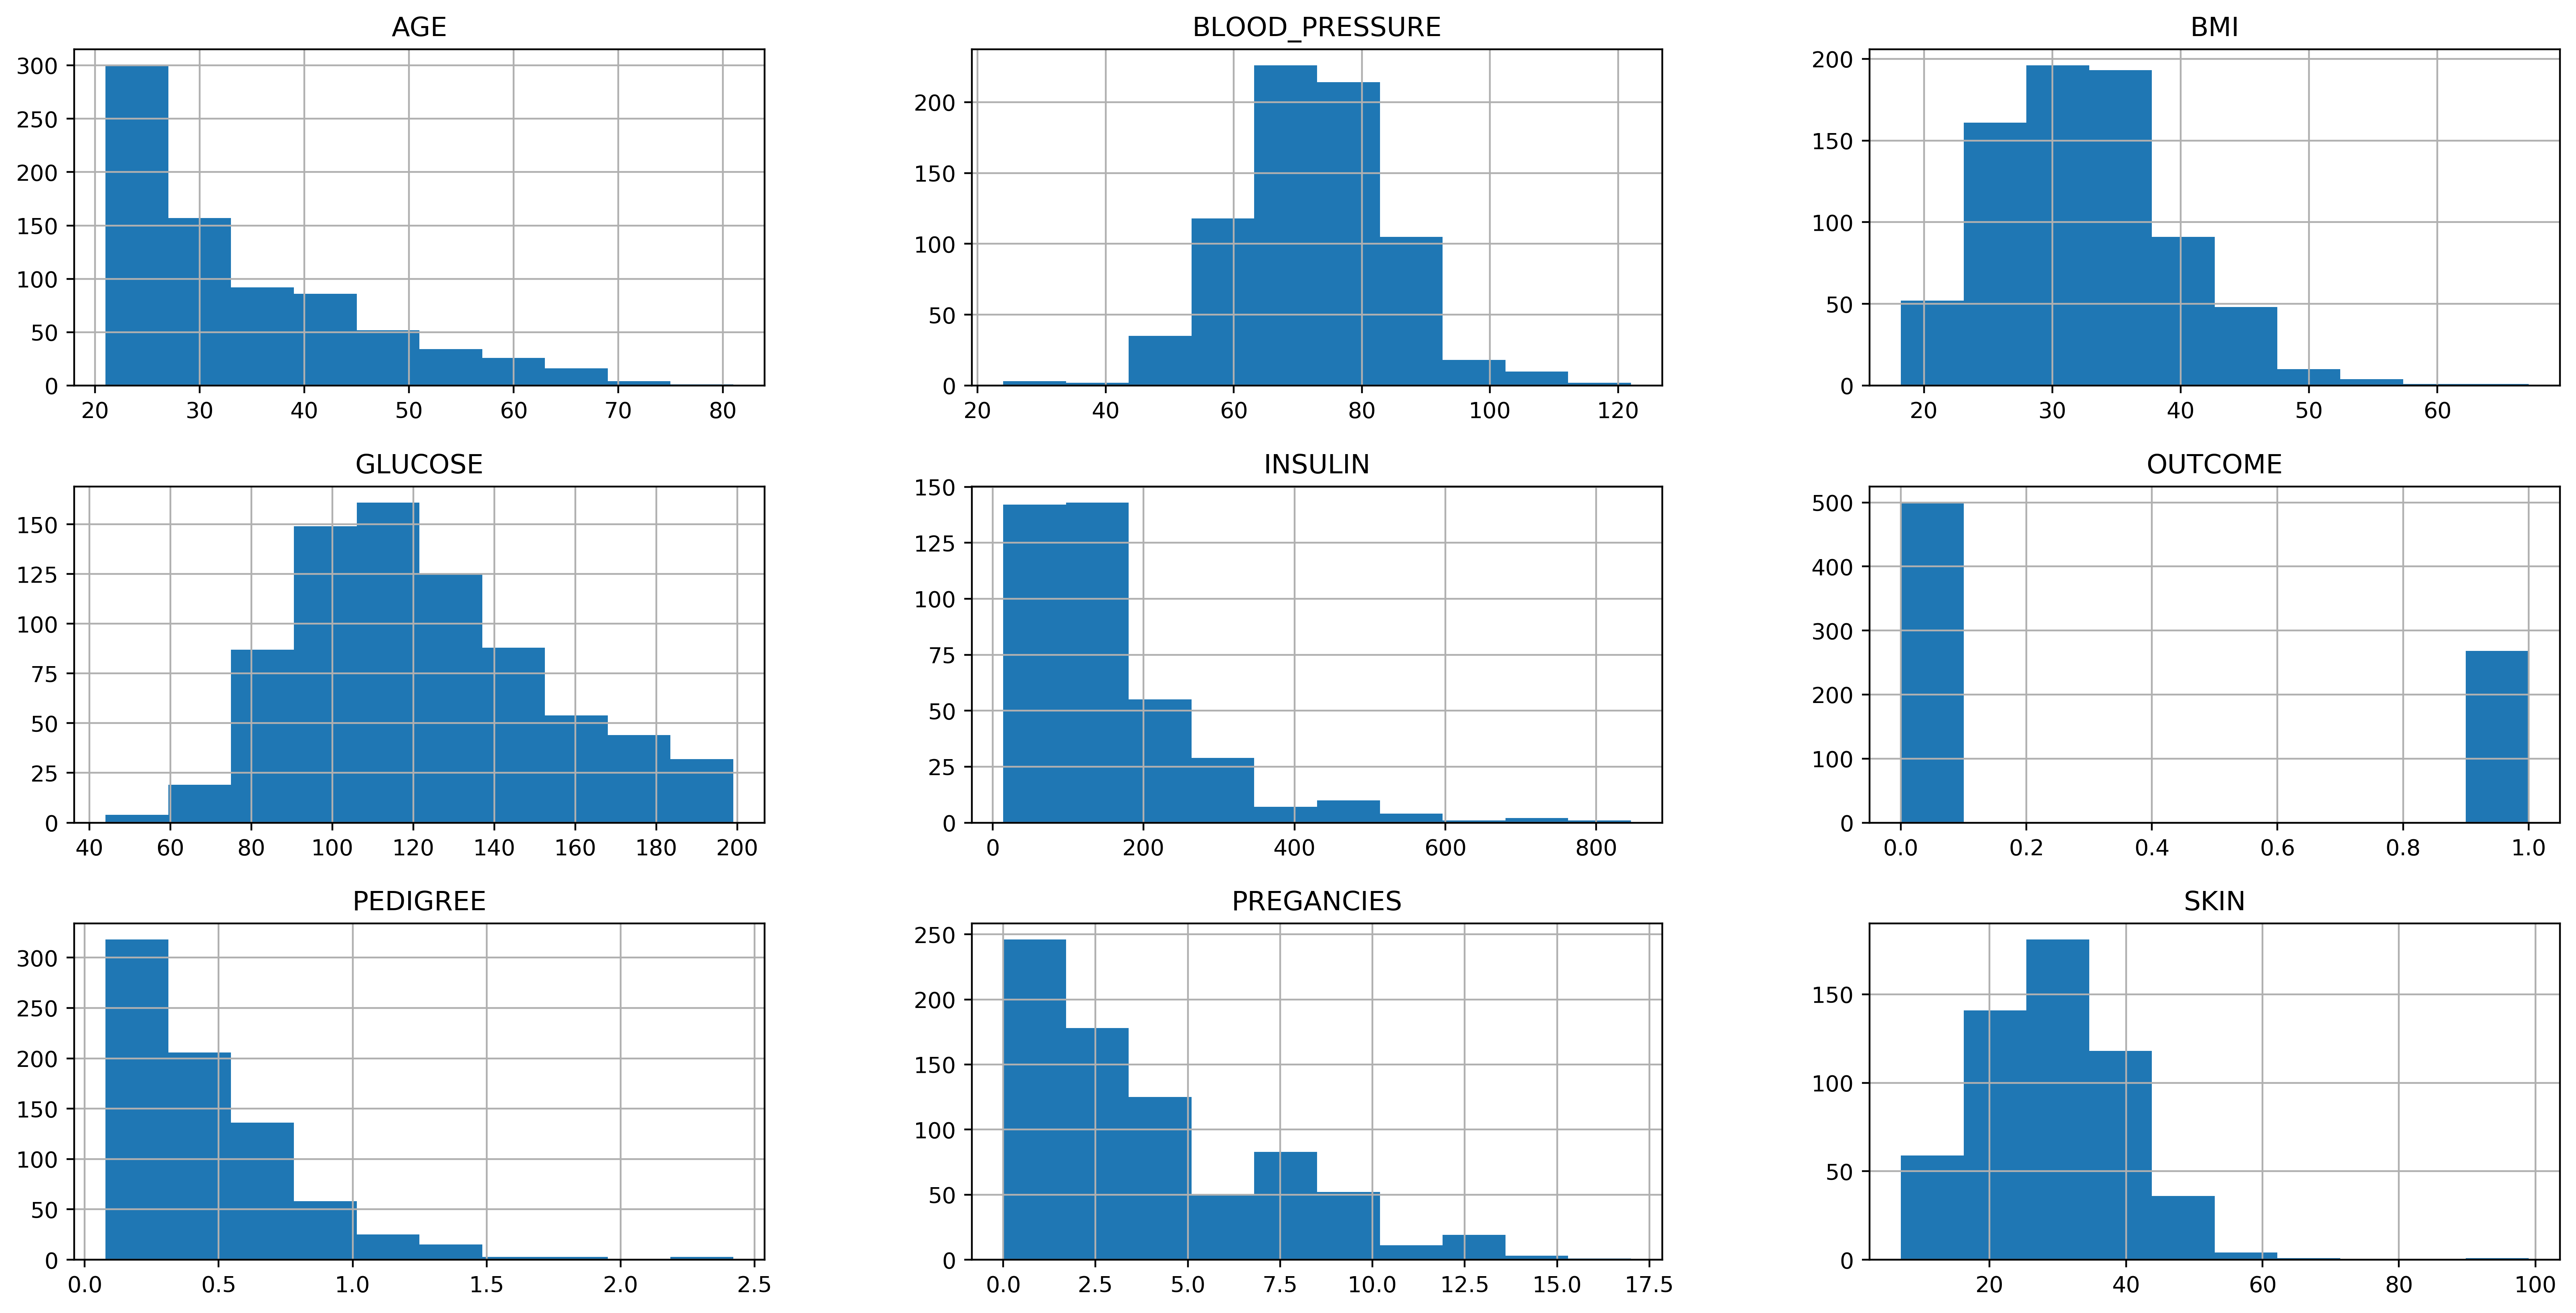

In [ ]:
# plots com histogramas de todo o dataset
df.hist(figsize = (20,10))

In [ ]:
df.describe()

,PREGANCIES,GLUCOSE,BLOOD_PRESSURE,SKIN,INSULIN,BMI,PEDIGREE,AGE,OUTCOME
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# não há mais dados zerados
print((df[['GLUCOSE', 'BLOOD_PRESSURE', 'SKIN', 'INSULIN', 'BMI']] == 0).sum())

GLUCOSE           0
BLOOD_PRESSURE    0
SKIN              0
INSULIN           0
BMI               0
dtype: int64


In [ ]:
# investigar a variável INSULINA
df['INSULIN'].describe()


count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: INSULIN, dtype: float64

In [ ]:
df.loc[(df['INSULIN'] > 139) & (df['INSULIN'] < 200)].count()


PREGANCIES        84
GLUCOSE           84
BLOOD_PRESSURE    84
SKIN              84
INSULIN           84
BMI               84
PEDIGREE          84
AGE               84
OUTCOME           84
dtype: int64

In [ ]:
print('A média é: ', df['INSULIN'].median())
print('A mediana é: ', df['INSULIN'].mean())
print('A moda é: ', df['INSULIN'].mode())
print('O desvio padrão é: ', df['INSULIN'].std())
print('O coeficiente de variação é: ', df['INSULIN'].std() / df['INSULIN'].mean()*100)


A média é:  125.0
A mediana é:  155.5482233502538
A moda é:  0    105.0
dtype: float64
O desvio padrão é:  118.77585518724514
O coeficiente de variação é:  76.35950615764544


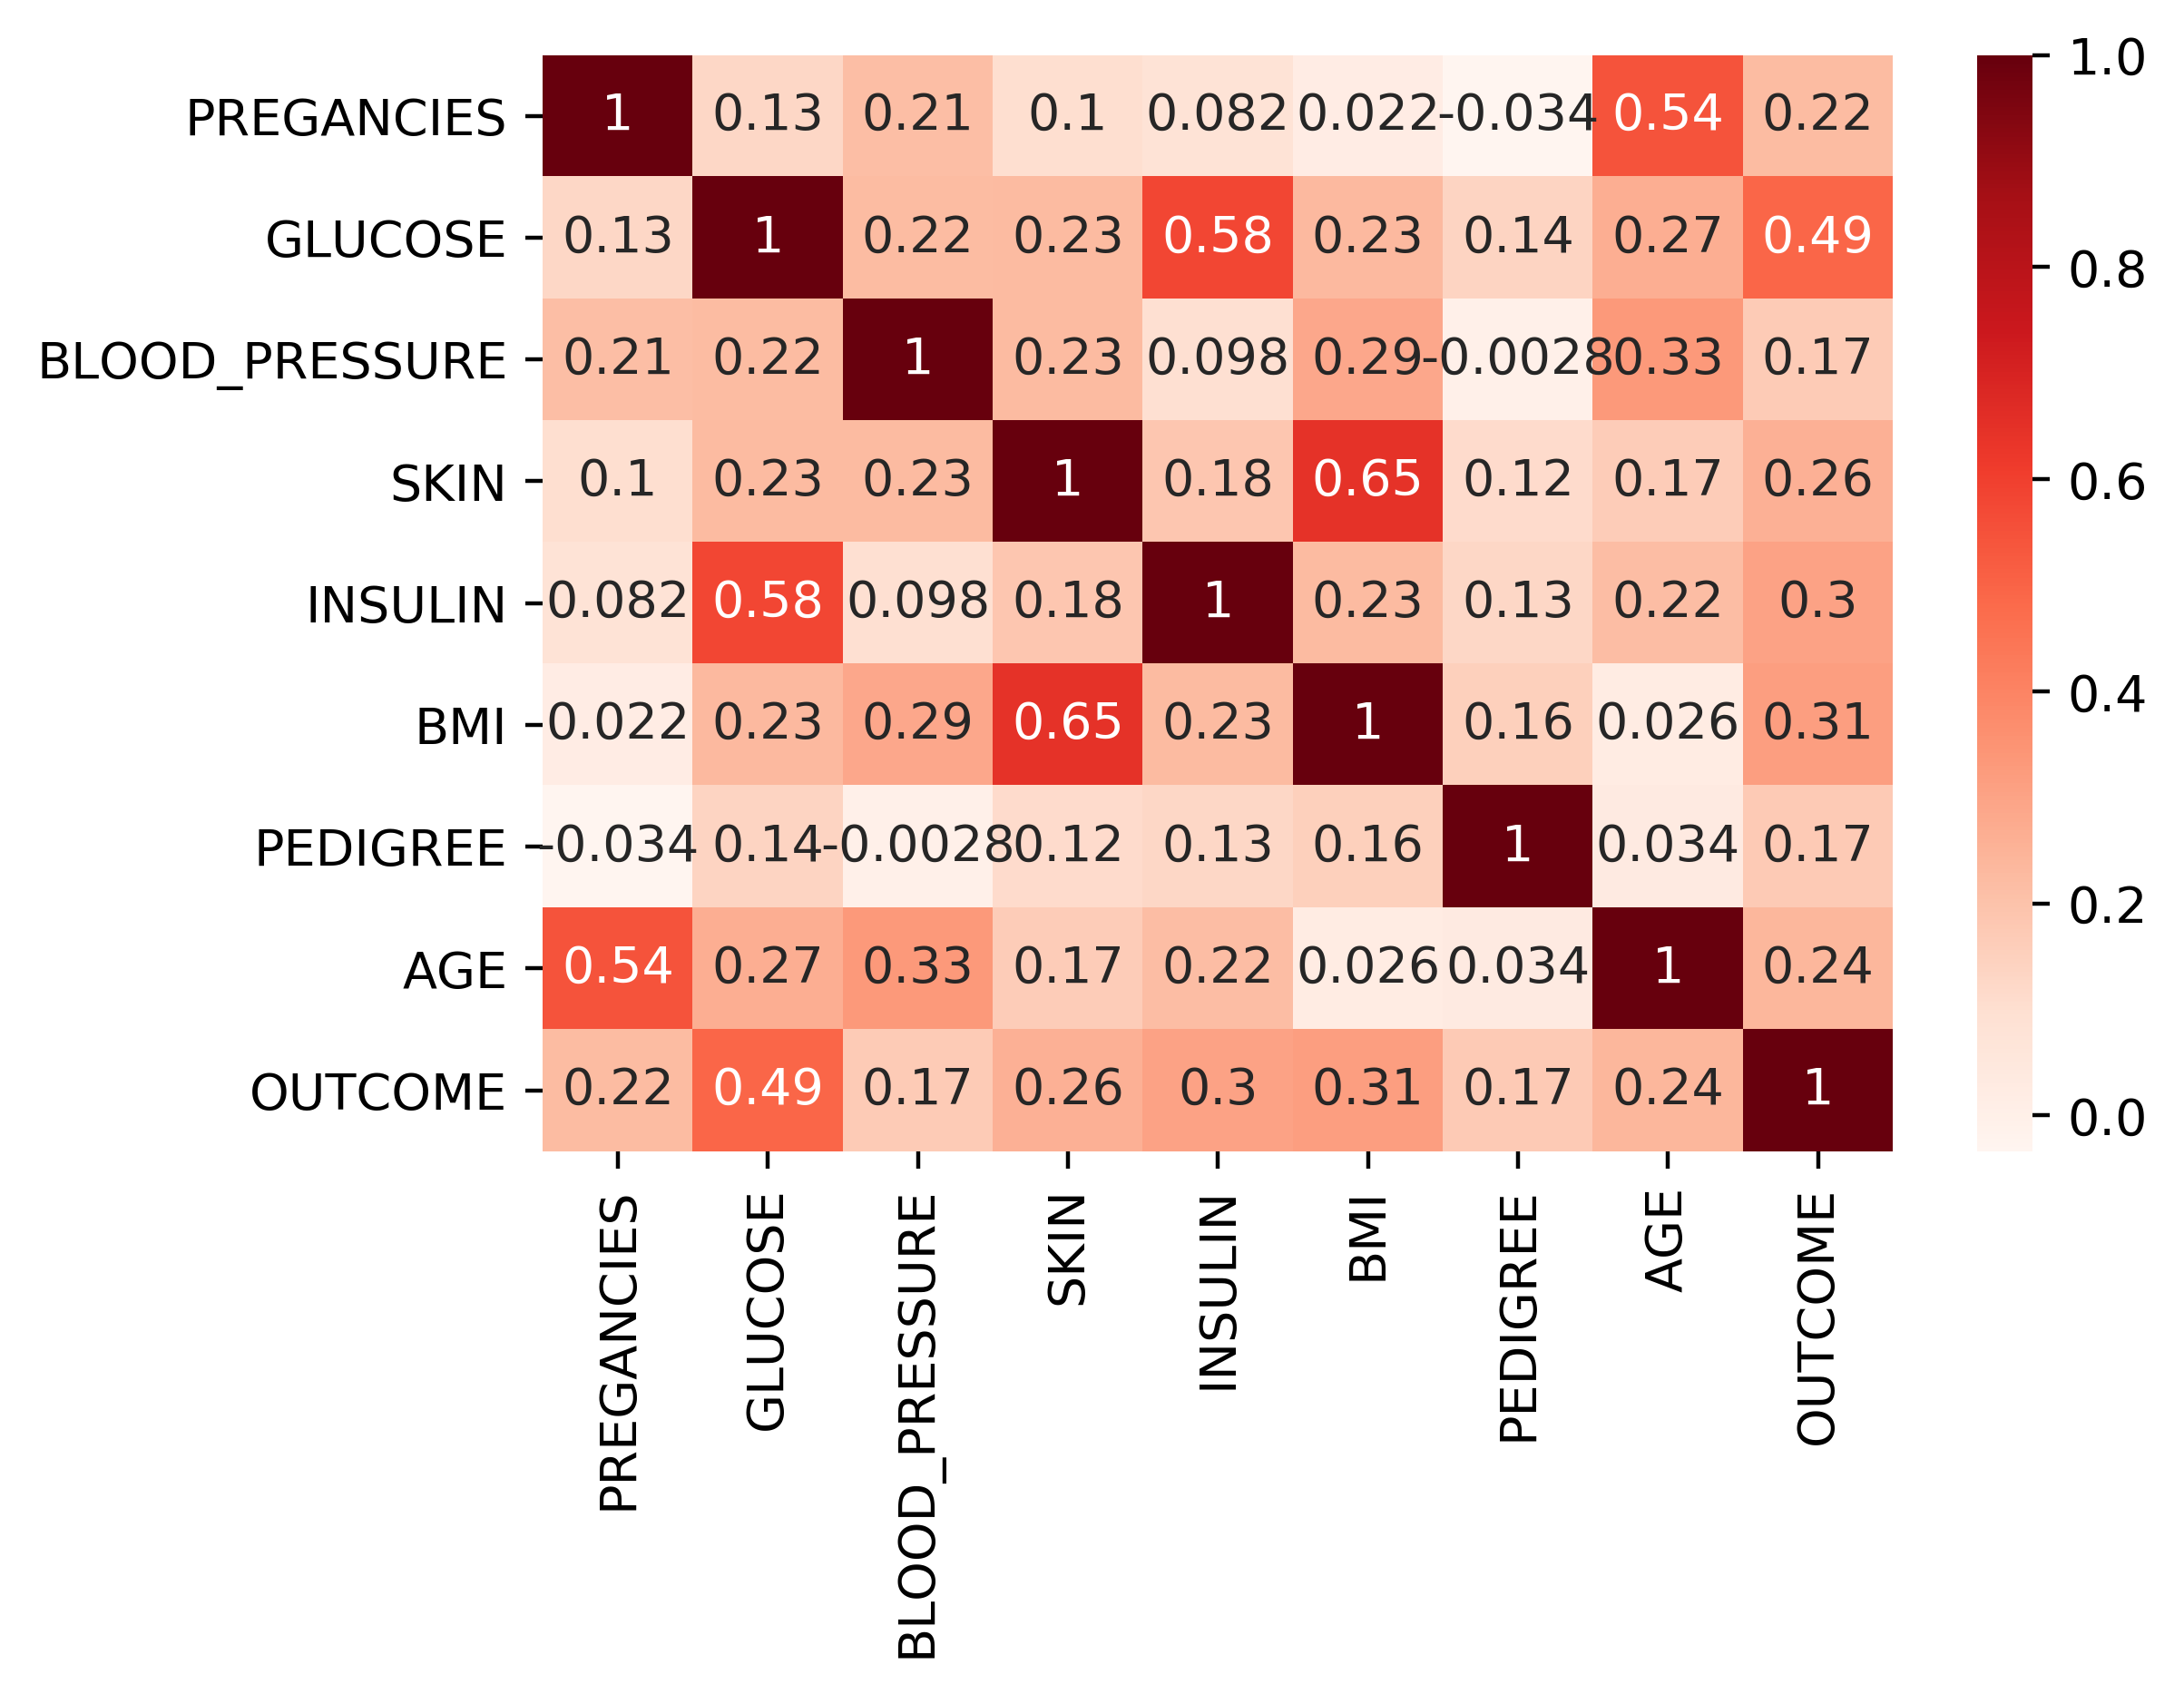

In [ ]:
# Investigar a correlação com seaborn
corr = df.corr()
sb.heatmap(corr, cmap = 'Reds', annot = True)


Text(0.5, 1.0, 'Distribuição da variável OUTCOME em relação a GLUCOSE')

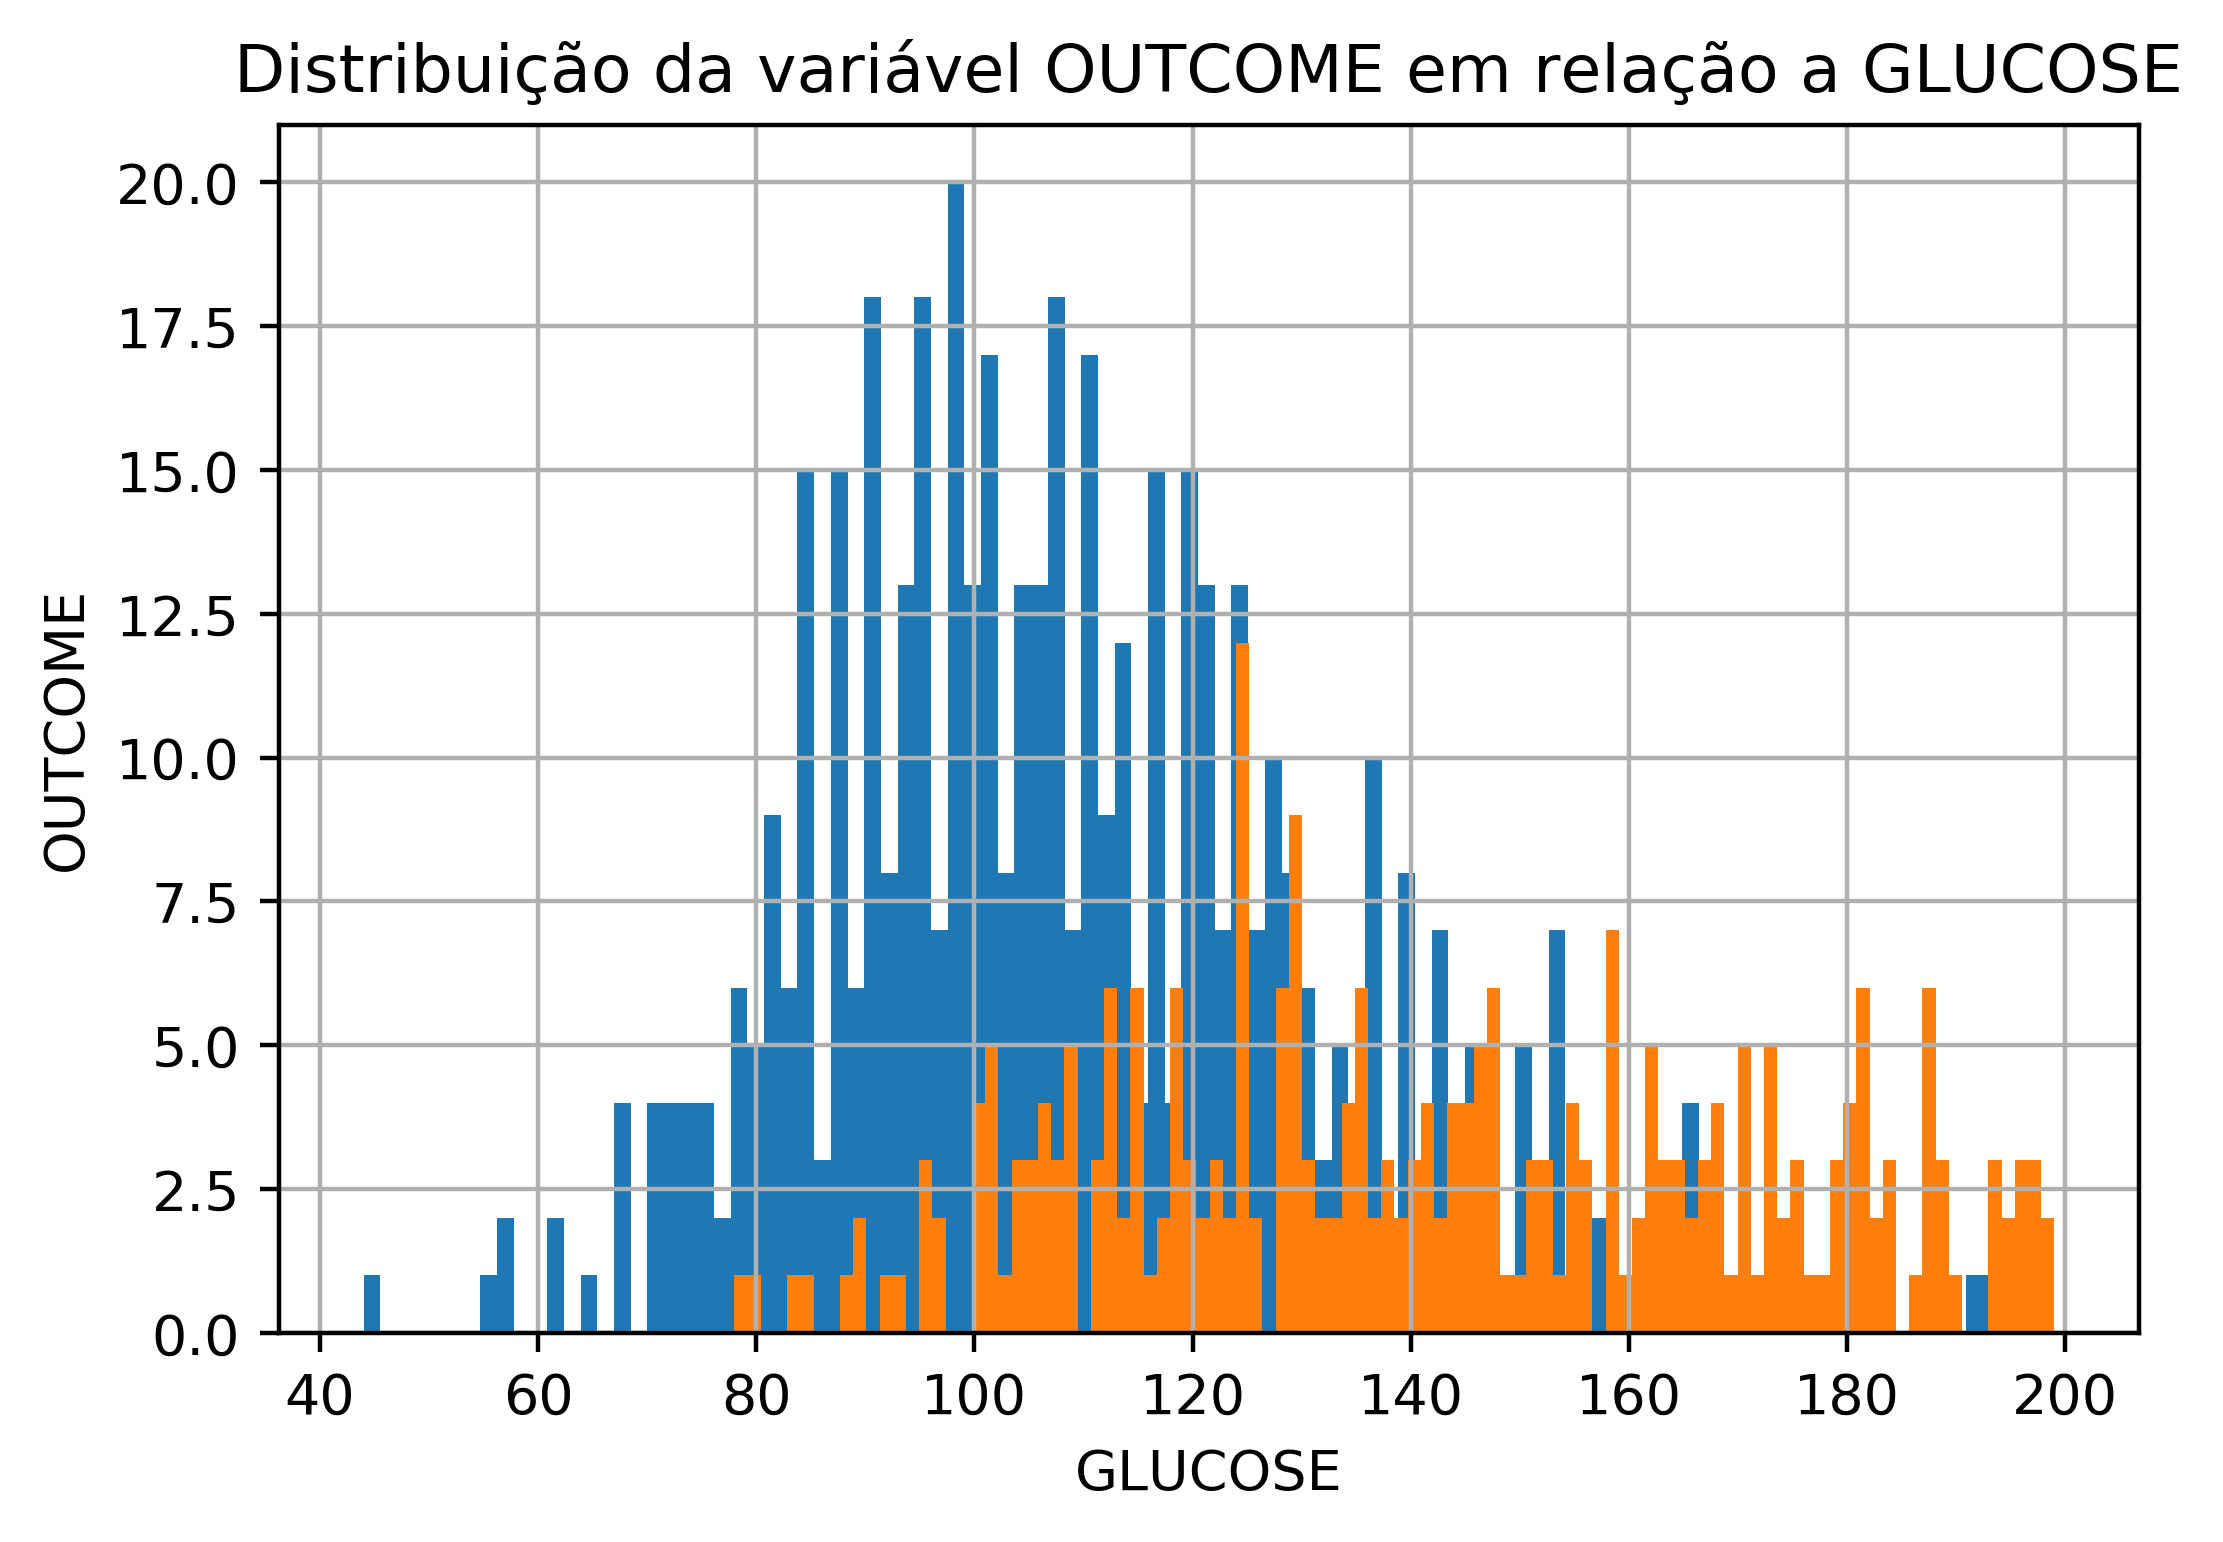

In [ ]:
# ESTUDO DAS CORRELAÇÕES: OUTCOME X GLUCOSE
# plot com histograma


df.groupby('OUTCOME')['GLUCOSE'].hist(bins = 100)
plt.xlabel('GLUCOSE')
plt.ylabel('OUTCOME')
plt.title('Distribuição da variável OUTCOME em relação a GLUCOSE')


Text(0.5, 1.0, 'Distribuição da variável OUTCOME em relação a BMI')

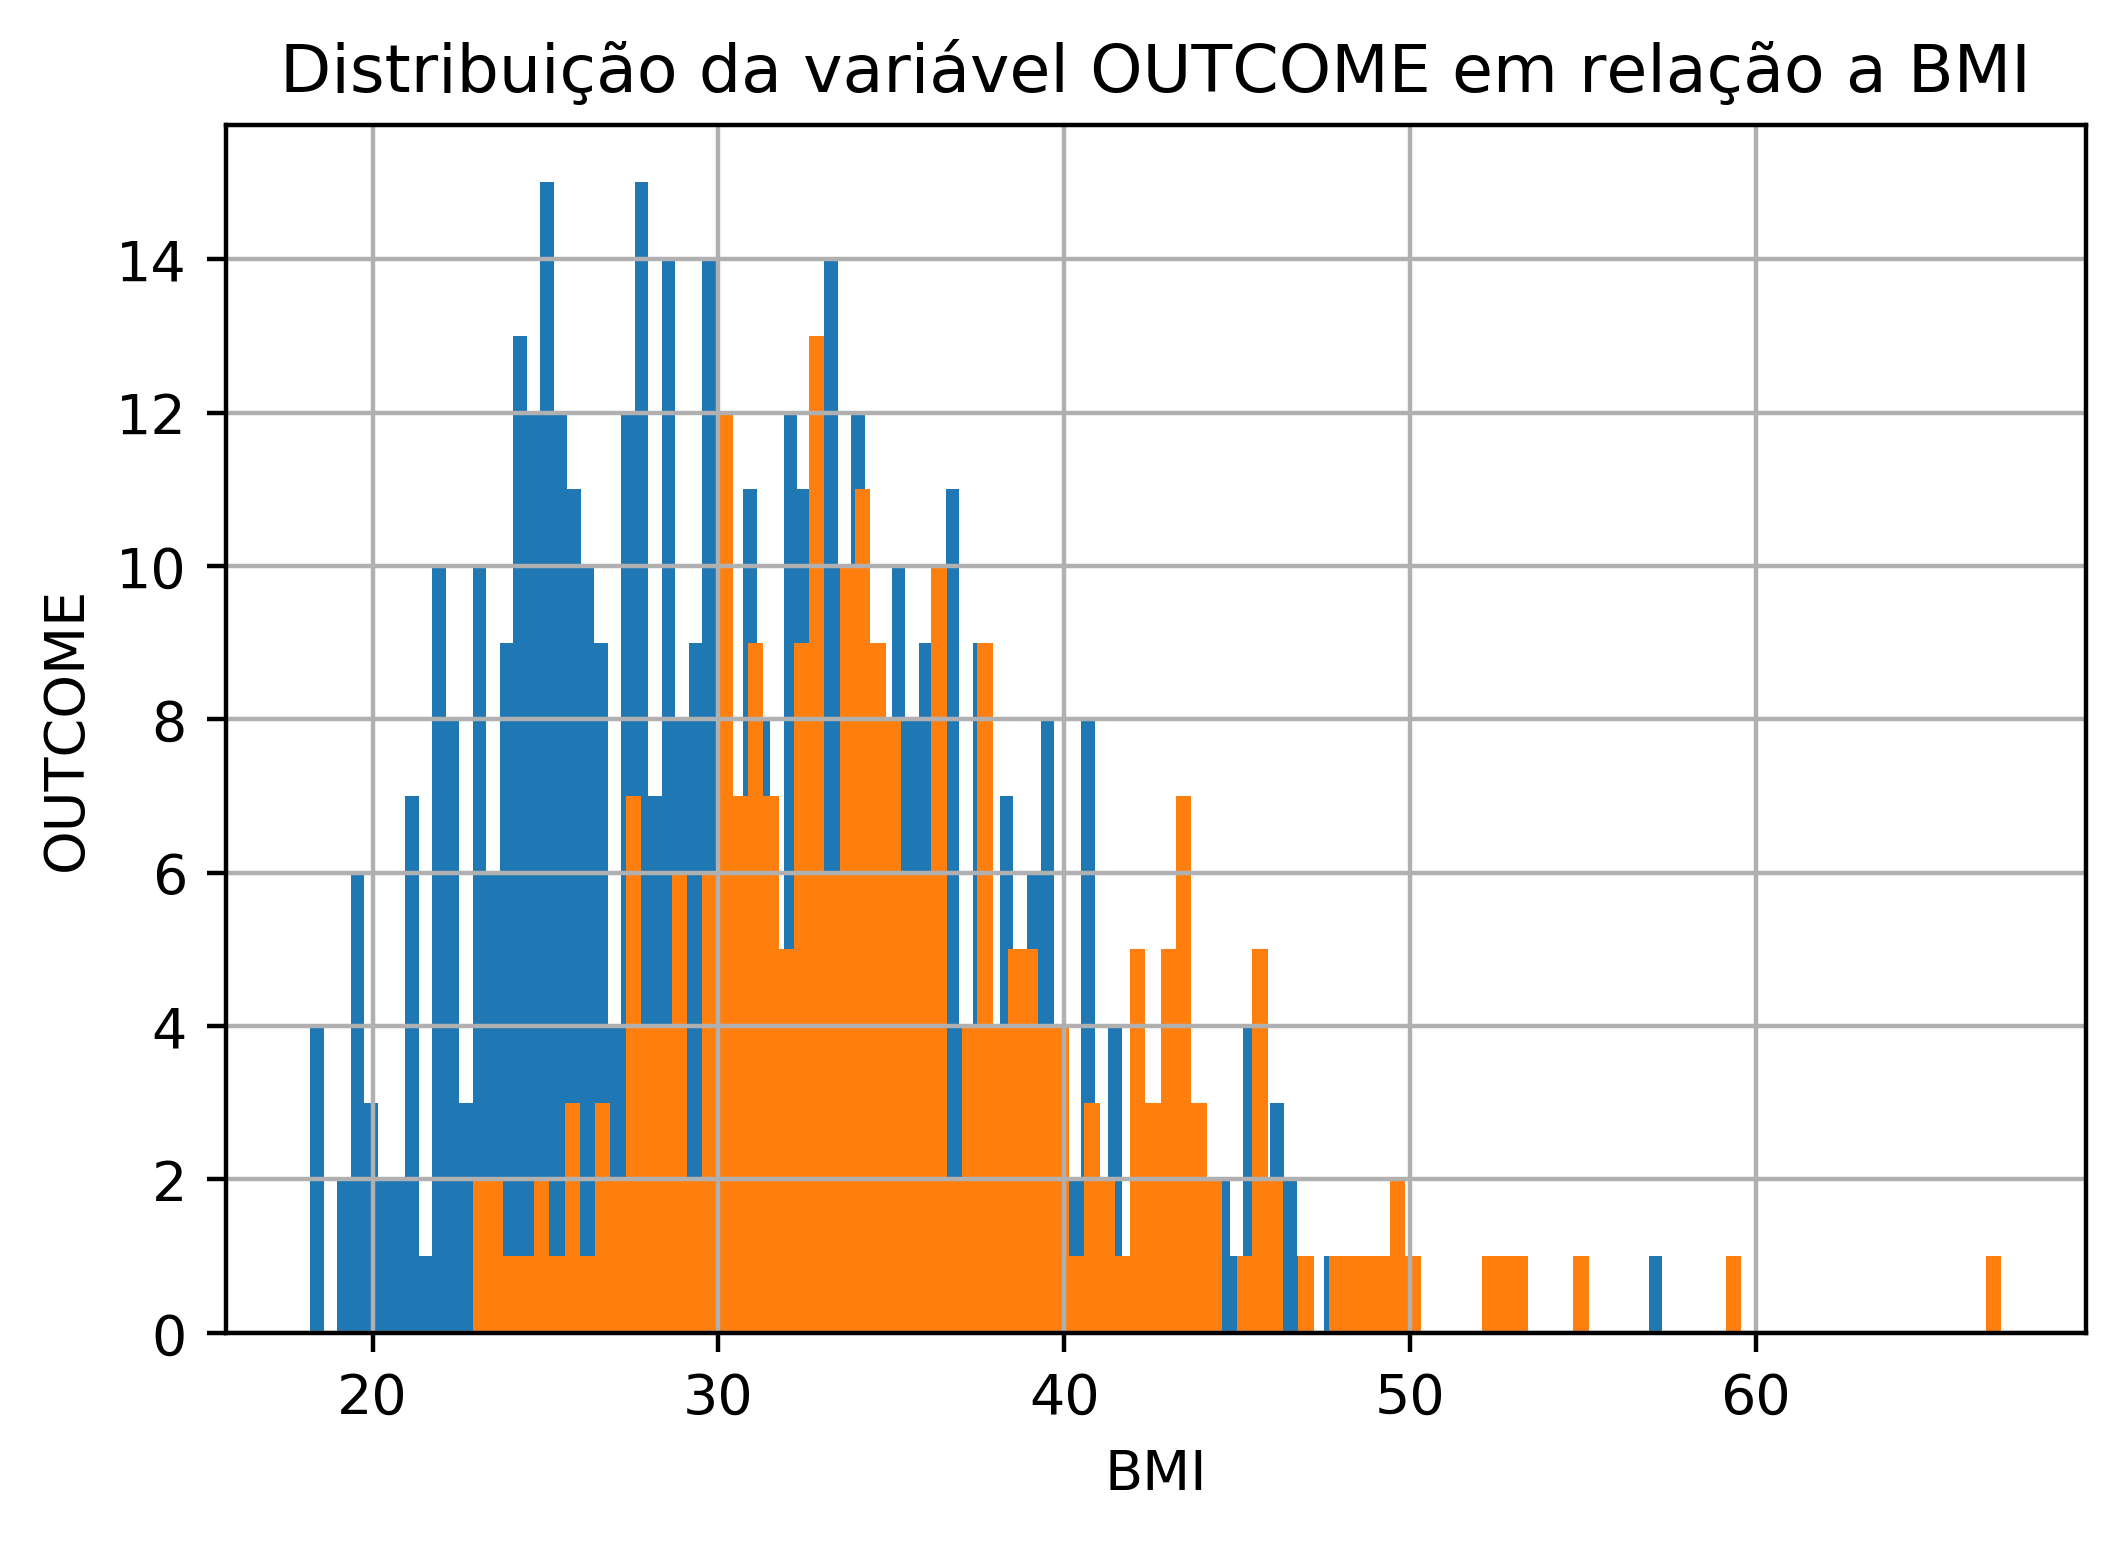

In [ ]:
# ESTUDO DAS CORRELAÇÕES: OUTCOME X BMI

# plot com histograma
df.groupby('OUTCOME')['BMI'].hist(bins = 100)
plt.xlabel('BMI')
plt.ylabel('OUTCOME')
plt.title('Distribuição da variável OUTCOME em relação a BMI')


Text(0.5, 1.0, 'Distribuição da variável OUTCOME em relação a AGE')

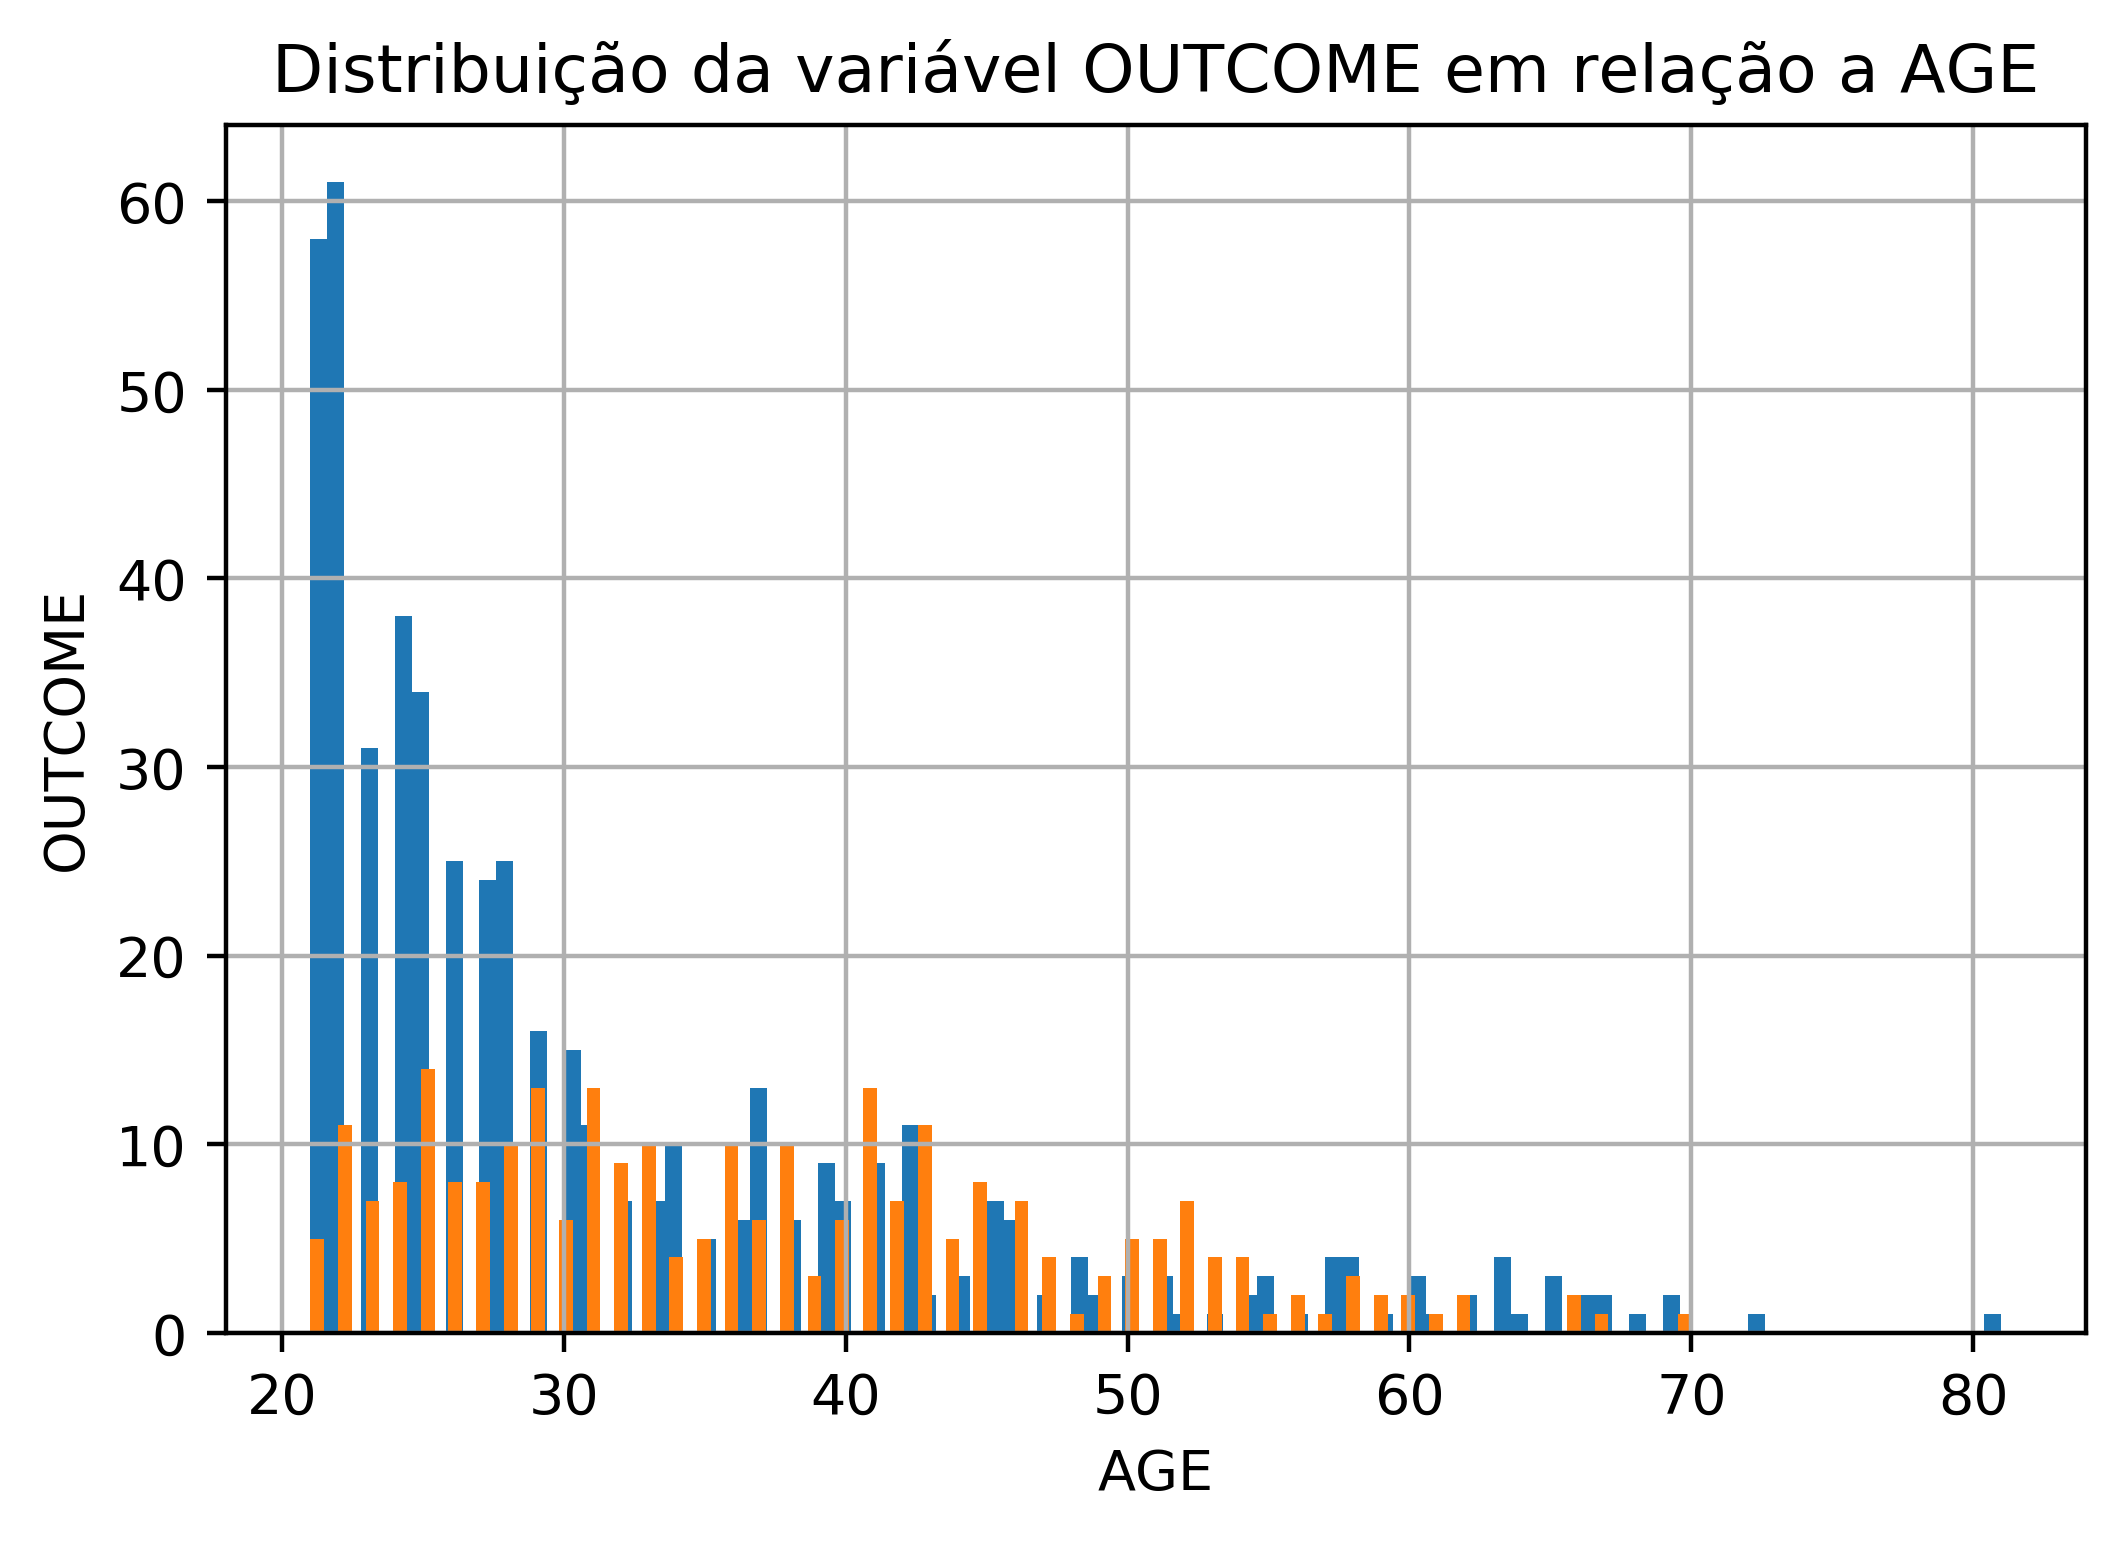

In [ ]:
# ESTUDO DAS CORRELAÇÕES: OUTCOME X AGE

# plot com histograma
df.groupby('OUTCOME')['AGE'].hist(bins = 100)
plt.xlabel('AGE')
plt.ylabel('OUTCOME')
plt.title('Distribuição da variável OUTCOME em relação a AGE')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018B935B7348>,
      dtype=object)

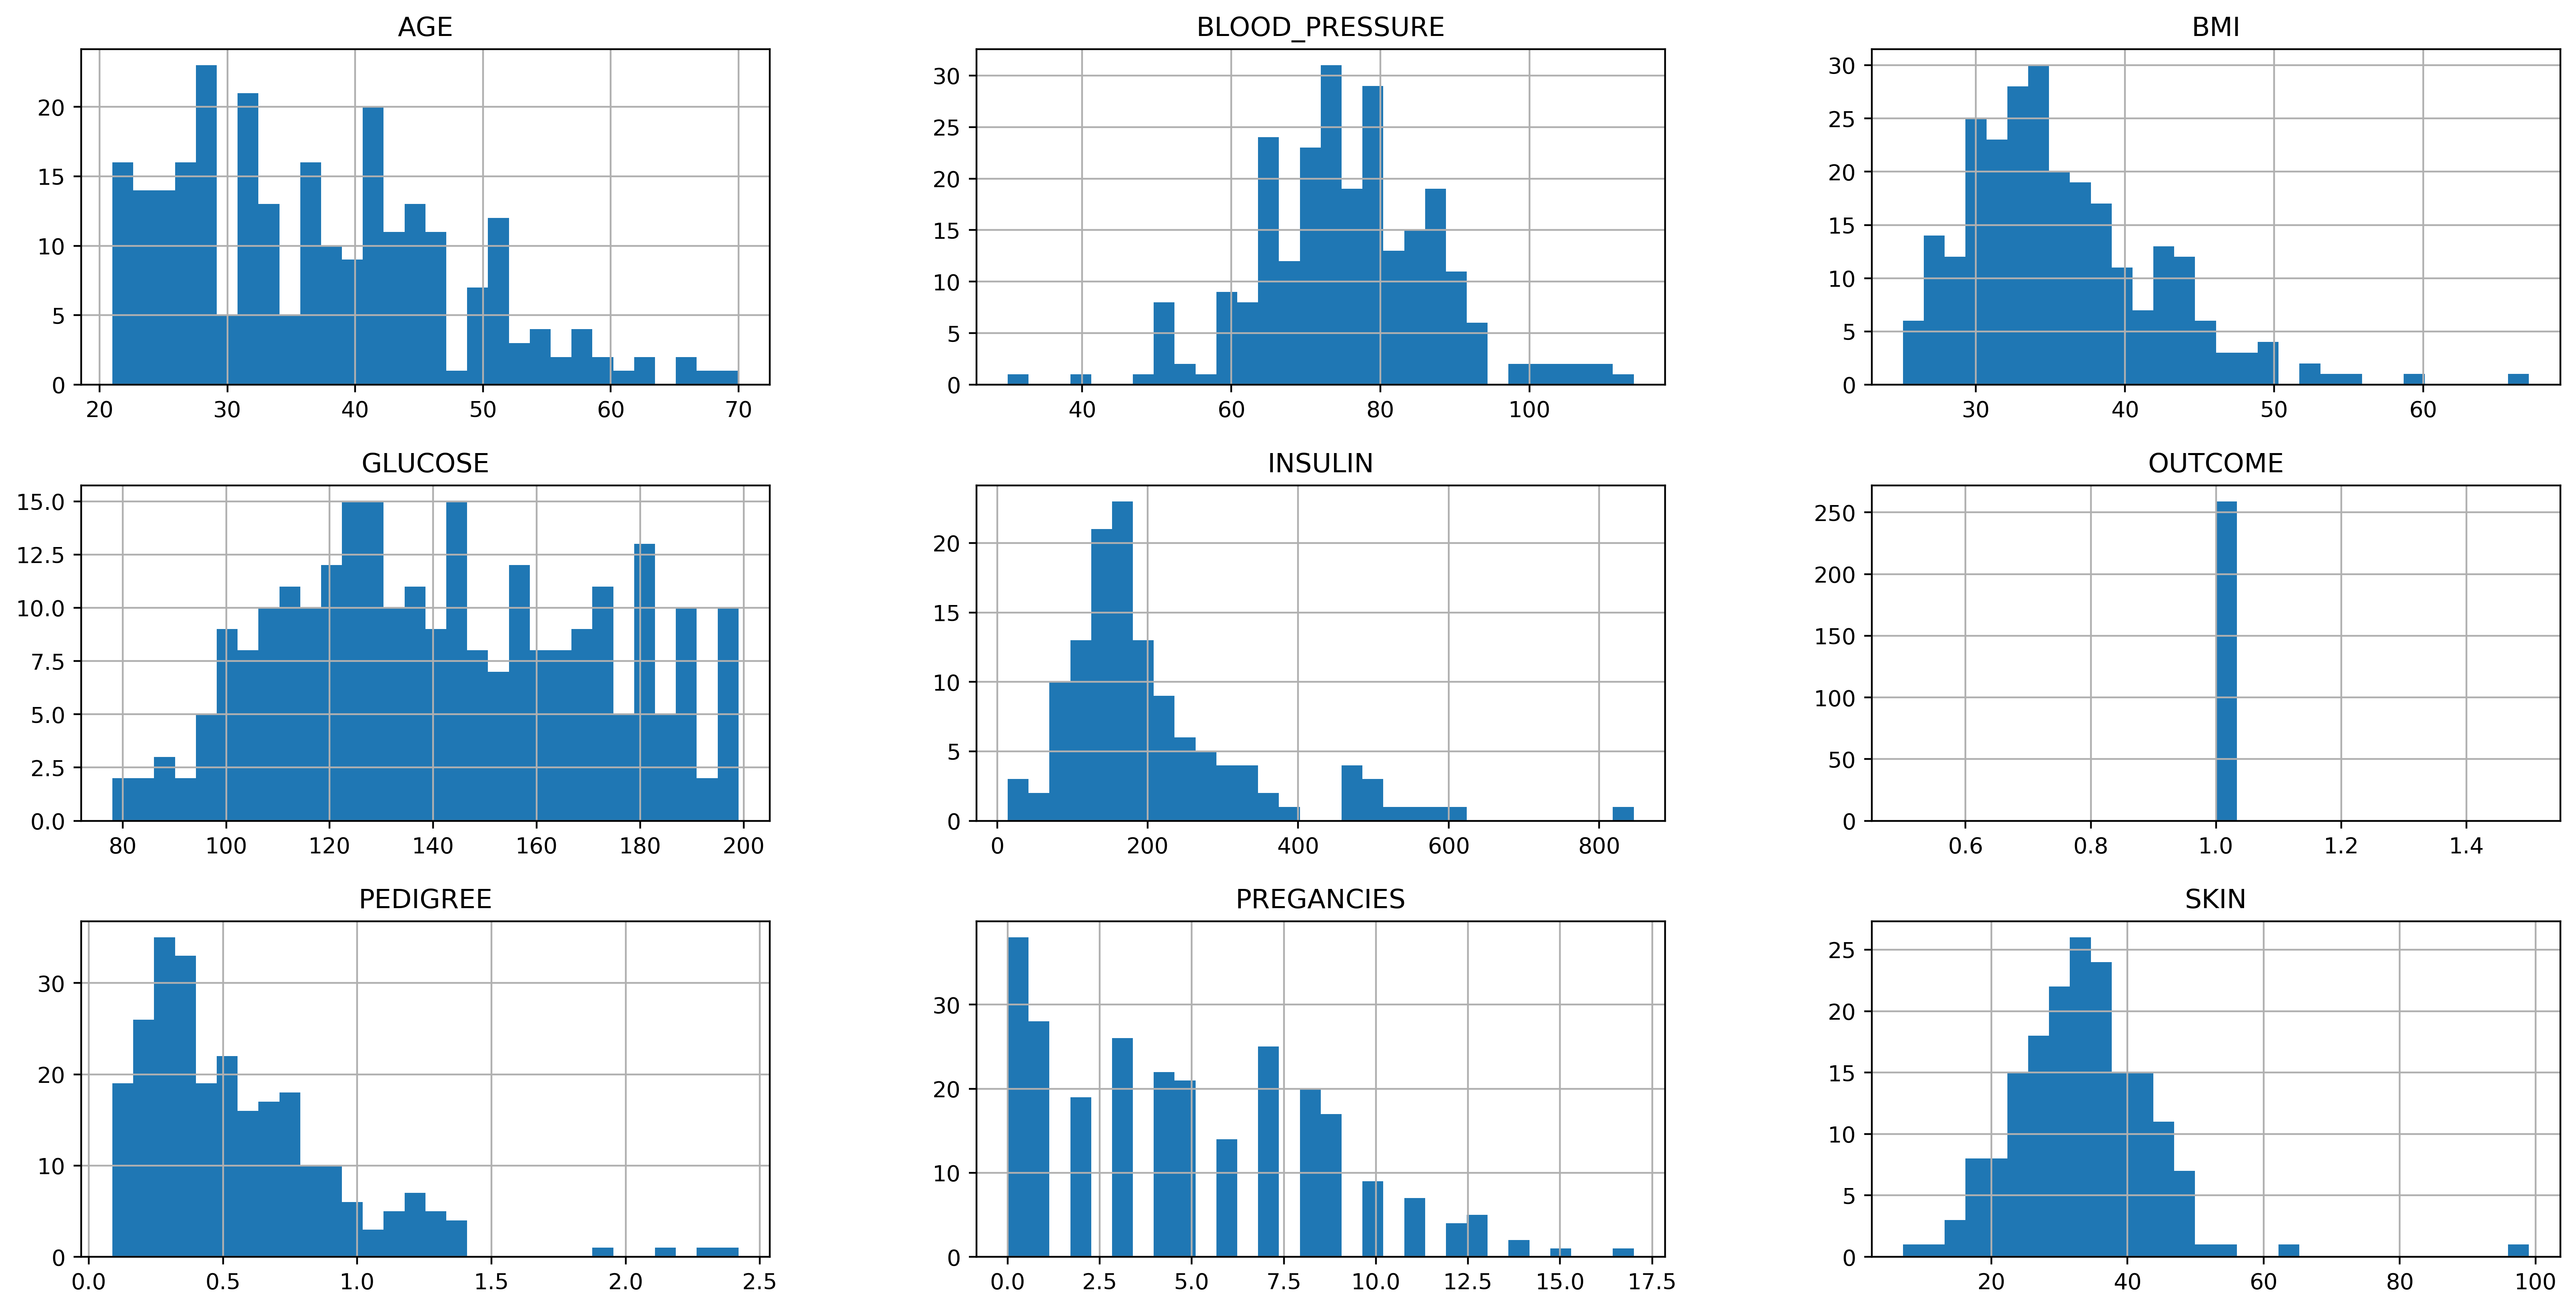

In [ ]:
# Análise das variáveis preditoras para positivados com diabete e BMI > 25
# De acordo com pesquisa, valores de BMI > 25 indica sobrepeso, BMI > 30 indica obesidade
df.loc[(df['OUTCOME'] == 1) & (df['BMI'] > 25)].hist(figsize = (20,10), bins = 30)

In [ ]:
df.loc[(df['OUTCOME'] == 1) & (df['BMI'] > 25)].count()

PREGANCIES        259
GLUCOSE           257
BLOOD_PRESSURE    244
SKIN              178
INSULIN           128
BMI               259
PEDIGREE          259
AGE               259
OUTCOME           259
dtype: int64

# MACHINE LEARNING COM LOGISTIC REGRESSION

Parece que para muitos essa é a fase 'mágica". Eu acredito que tudo é muito fantástico!

Vamos explorar o poder dos algoritmos Logistic Regression, Decision Tree e Random Forest com SciKit-Learn, e descobrir suas características e vantagens.

Vamos começar pelo mais comum, digamos assim, a Regressão Logística.
Para mais detalhes, veja a documentação oficial no site: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Na documentação você descobrirá que LR é um algoritmo de classificação baseado em linearidade.
A LR faz por padrão a regularização dos dados.

Aqui você se aprofunda nos parametros do algoritmo: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

Eu ultra recomendo a leitura, porque é aqui que você demonstra seu poder como especialista em machine learning!

In [ ]:
# carregar pacotes

# basicamente, para cada algoritmo você deve, minimamente, carregar uma métrica e o pacote split
from sklearn.linear_model import LogisticRegression

# Acurácia: calcula a precisão dos dados previstos
from sklearn.metrics import accuracy_score

# ROC_AUC: Compute Area Under the Receiver Operating Characteristic Curve = "Calcular a área sob a curva 
# característica de operação do receptor"
from sklearn.metrics import confusion_matrix

# separando dados teste e de treino
# Esse você vai usar quase sempre
from sklearn.model_selection import train_test_split

In [ ]:
medias = df[['PREGANCIES', 'GLUCOSE', 'BLOOD_PRESSURE', 'SKIN', 'INSULIN', 'BMI', 'PEDIGREE', 'AGE']].mean()

print('As médias para cada coluna com valores NaN é:')

medias

# Atenção: Não fiz média para OUTCOME
# O script para a média é maior que .decribe(), mas o resultado é mais clean!

As médias para cada coluna com valores NaN é:


PREGANCIES          3.845052
GLUCOSE           121.686763
BLOOD_PRESSURE     72.405184
SKIN               29.153420
INSULIN           155.548223
BMI                32.457464
PEDIGREE            0.471876
AGE                33.240885
dtype: float64

In [ ]:
# aplicando as médias a cada coluna
df[['PREGANCIES', 'GLUCOSE', 'BLOOD_PRESSURE', 'SKIN', 'INSULIN', 'BMI','PEDIGREE', 'AGE']] = df[['PREGANCIES', 'GLUCOSE', 'BLOOD_PRESSURE', 'SKIN', 'INSULIN', 'BMI',
       'PEDIGREE', 'AGE']].fillna(value=df[['PREGANCIES', 'GLUCOSE', 'BLOOD_PRESSURE', 'SKIN', 'INSULIN', 'BMI',
       'PEDIGREE', 'AGE']].mean())

# É um código grande e parece meio confuso, mas isso só porque as variáveis se repetem três vezes.
# Resumindo, eu selecionei as variáveis desejaveis (quase toda transformação pode seguir esse passo), depois 
# disse que essas mesmas variáveis com valores NA seriam preenchidas (.fillna) pela médias (.mean)

In [ ]:
# não existem mais valores Na
df.count().isna()

PREGANCIES        False
GLUCOSE           False
BLOOD_PRESSURE    False
SKIN              False
INSULIN           False
BMI               False
PEDIGREE          False
AGE               False
OUTCOME           False
dtype: bool

In [ ]:
# Agora teremos que normalizar o dataset
# Logistic Regression precisa de dados normalizados para funcionar
# Carregar pacote
from sklearn import preprocessing

In [ ]:
# Veja que eu criei um novo objeto porque o standardscaler muda o formato do df original

scale = preprocessing.StandardScaler()

In [ ]:
# Normalizar e converter em um dataframe.
# A normalização acontece apenas nas variáveis independentes [0:9]

y = scale.fit(df.drop('OUTCOME', axis = 1))

X = scale.transform(df.drop('OUTCOME', axis = 1))

df_scaled = pd.DataFrame(X, columns = df.columns[:-1])

df_scaled['OUTCOME'] = df['OUTCOME'].astype(int)

df = df_scaled.copy()

df

,PREGANCIES,GLUCOSE,BLOOD_PRESSURE,SKIN,INSULIN,BMI,PEDIGREE,AGE,OUTCOME
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136,0
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023,0
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760,0
766,-0.844885,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732,1


In [ ]:
# Dividir em dados de treino e dados de teste

X = df.drop('OUTCOME', axis = 1)
y = df['OUTCOME']

In [ ]:
# Agora é só inserir os parametros para o treinamento
# O tamanho do test_size é determinado pelo especialista de machine learning ou pela equipe. Se não declarar será 0.25 (padão)
# O random_state é para a escolha aleatória e para que o possa ser repetido por outra pessoa

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y, random_state=100)

In [ ]:
# Observando a forma dos dados de treino e teste

print('Os dados de treino para X e y são:', X_train.shape, y_train.shape)
print('Os dados de teste para X e y são:', X_test.shape, y_test.shape)

Os dados de treino para X e y são: (537, 8) (537,)
Os dados de teste para X e y são: (231, 8) (231,)


In [ ]:
# treinar o modelo com Logistic Regression
# não irei alterar parametros

lr = LogisticRegression()
model_lr = lr.fit(X_train, y_train)

In [ ]:
# Criamos as previsões

pred_lr = lr.predict(X_test)

In [ ]:
# Agora nós temos um ndarray (1 dimensão)
pred_lr

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
# Aplicar métrica com score

acu_lr = accuracy_score(y_true= y_test, y_pred = pred_lr)
print('Com Logistic Regression foi possível chegar a ', acu_lr, ' de acurácia')

Com Logistic Regression foi possível chegar a  0.7792207792207793  de acurácia


In [ ]:
# Aplicando metrica: matriz de confusão
# Uma forma detalhada de ver os acertos e erros

confusion_matrix(y_true = y_test, y_pred = pred_lr)

array([[128,  22],
       [ 34,  47]], dtype=int64)

In [ ]:
# Interpretação das acurácias com Logistica Regression
# Percebe-se que 78% de acurácia para previsão da diabetes é muito baixa

# MACHINE LEARNING COM DECISION TREE CLASSIFIER

In [ ]:
# Carregar o pacote
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib as mpl


In [ ]:
# Busca pelo melhor max_leaf_nodes
acuracia = []
for i in range(2,200):
    # altera parametros
    dt = DecisionTreeClassifier(max_leaf_nodes = i, criterion = 'gini', max_features = 'sqrt', random_state = 100)
    
    # cria modelo
    model_dt = dt.fit(X_train, y_train)
    
    # Gera previsões
    pred_dt = dt.predict(X_test)
    
    # calcula acuracias de 2 a 99 max_leaf_nodes
    acur = accuracy_score(y_true=y_test, y_pred=pred_dt)
    acuracia.append(acur)
    
    #criar matrx de confusão pára cada max_leaf_nodes

    mc = confusion_matrix(y_true = y_test, y_pred = pred_dt)

In [ ]:
mc

array([[113,  37],
       [ 35,  46]], dtype=int64)

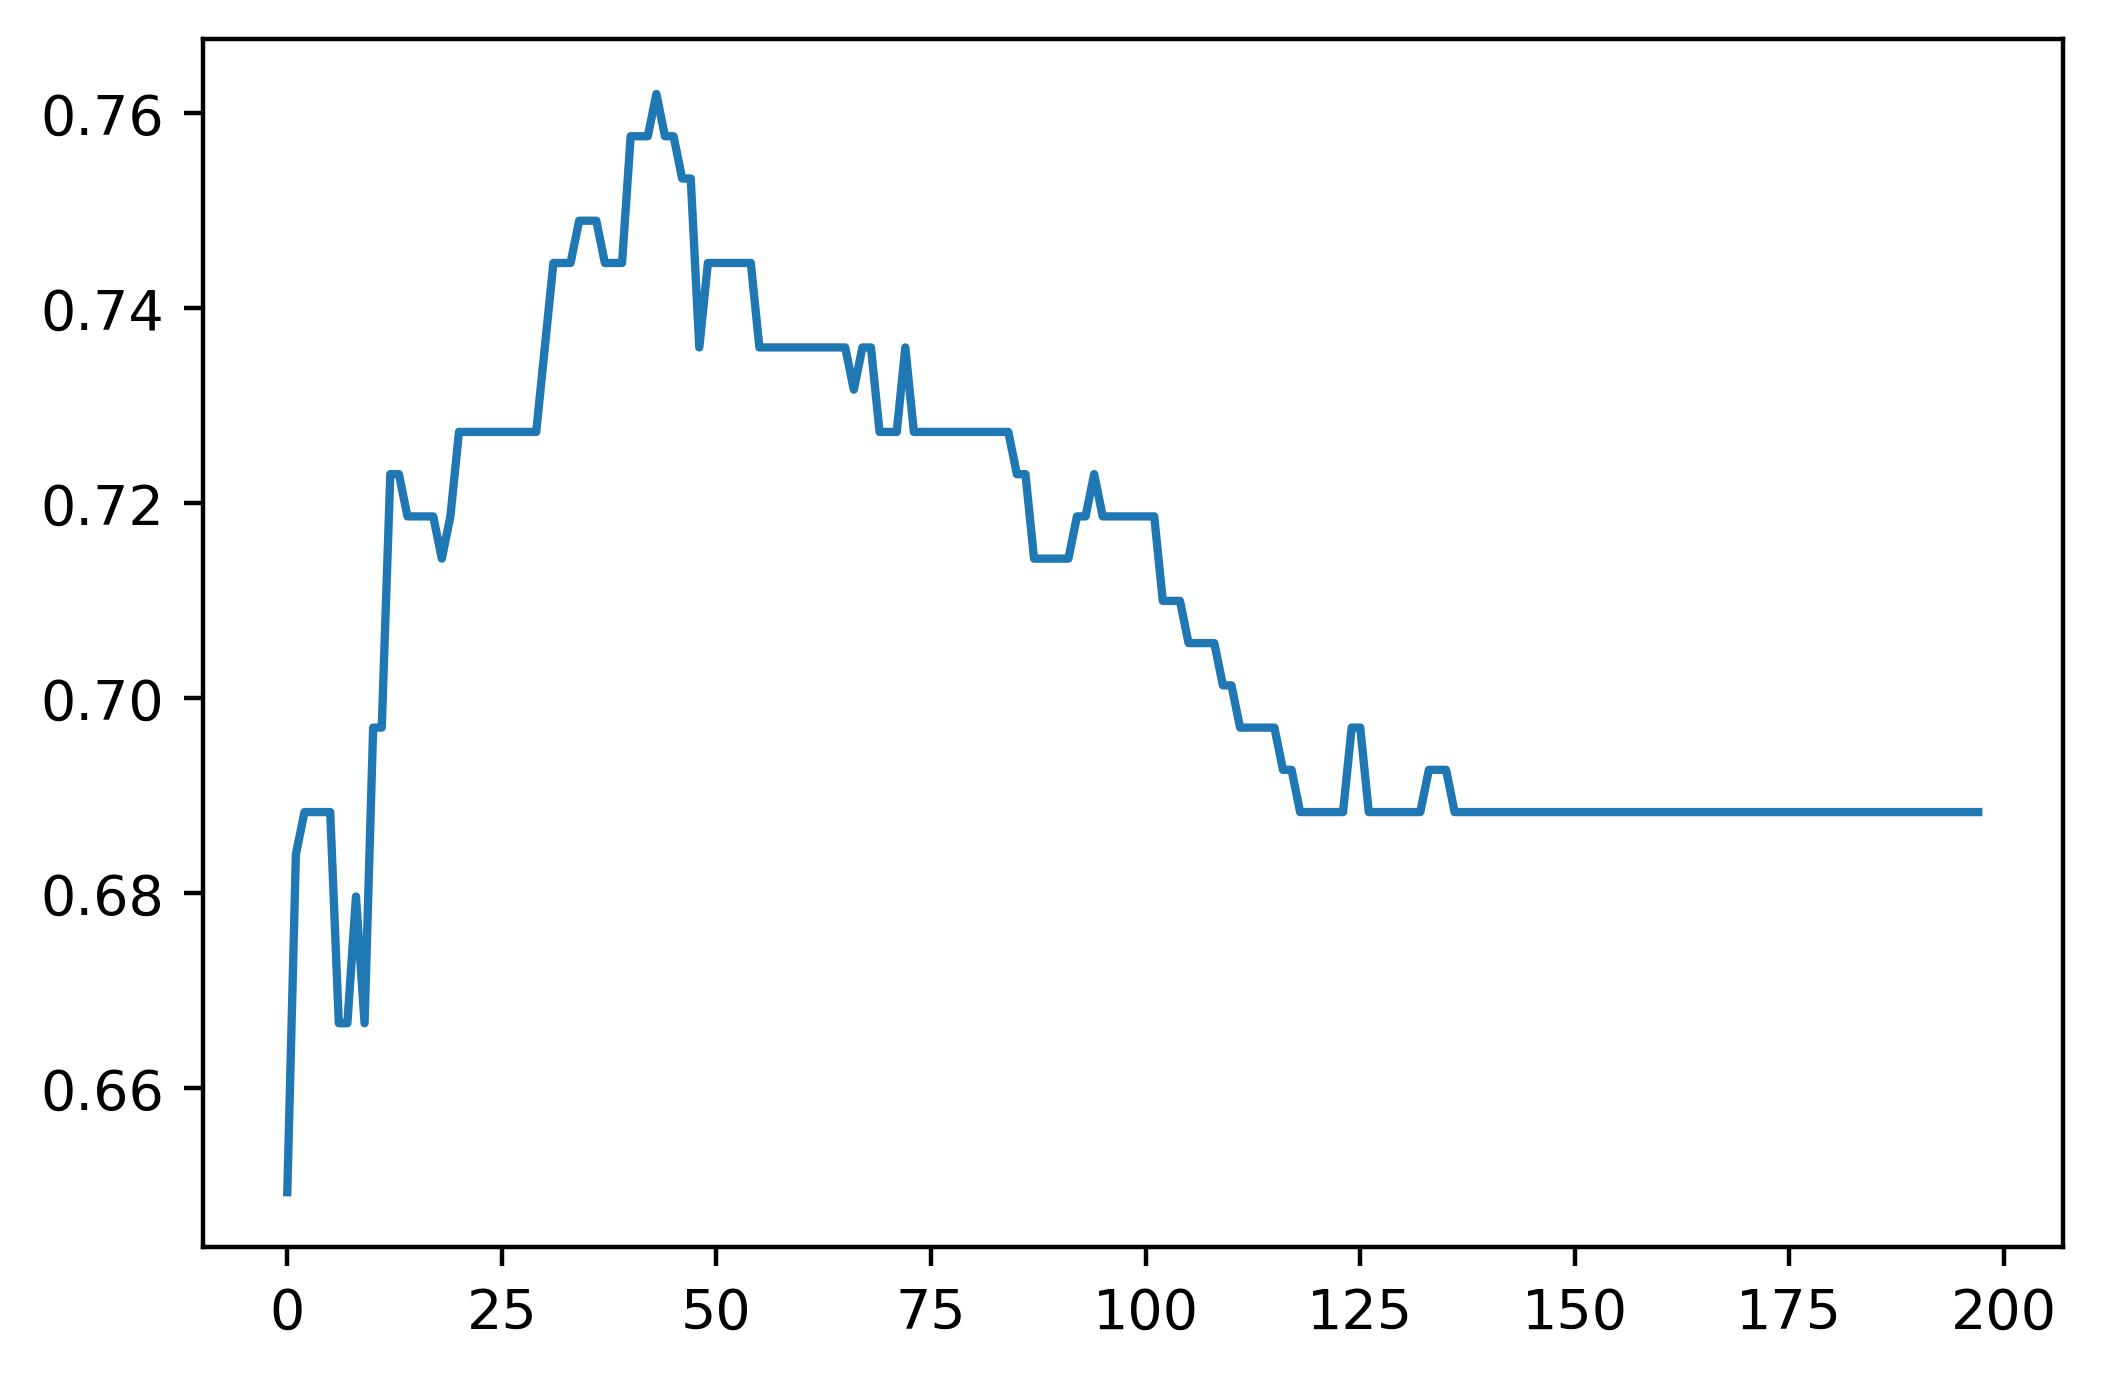

In [ ]:
plt.plot(acuracia)

In [ ]:
# Valor da acurácia máxima

max(acuracia)

0.7619047619047619

# MACHINE LEARNING COM RANDOM FOREST CLASSIFIER

In [ ]:
# Carregar pacotes
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Paramentros do random forest
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Encontrar a melhor acurácia, alterando n_estimator de 100 a 300
acuracia_rf = []
for i in range(100, 300):
    # Alterar parametros
    model_rf = RandomForestClassifier(random_state = 500,
                                  n_estimators = i, 
                                  max_features = 'sqrt')
    # Criar modelo
    model_rf.fit(X_train, y_train)
    
    # criar previsões
    pred_rf = model_rf.predict(X_test)
    
    # calcular acuracias
    acur_rf = accuracy_score(y_true= y_test, y_pred= pred_rf)
    acuracia_rf.append(acur_rf)
    

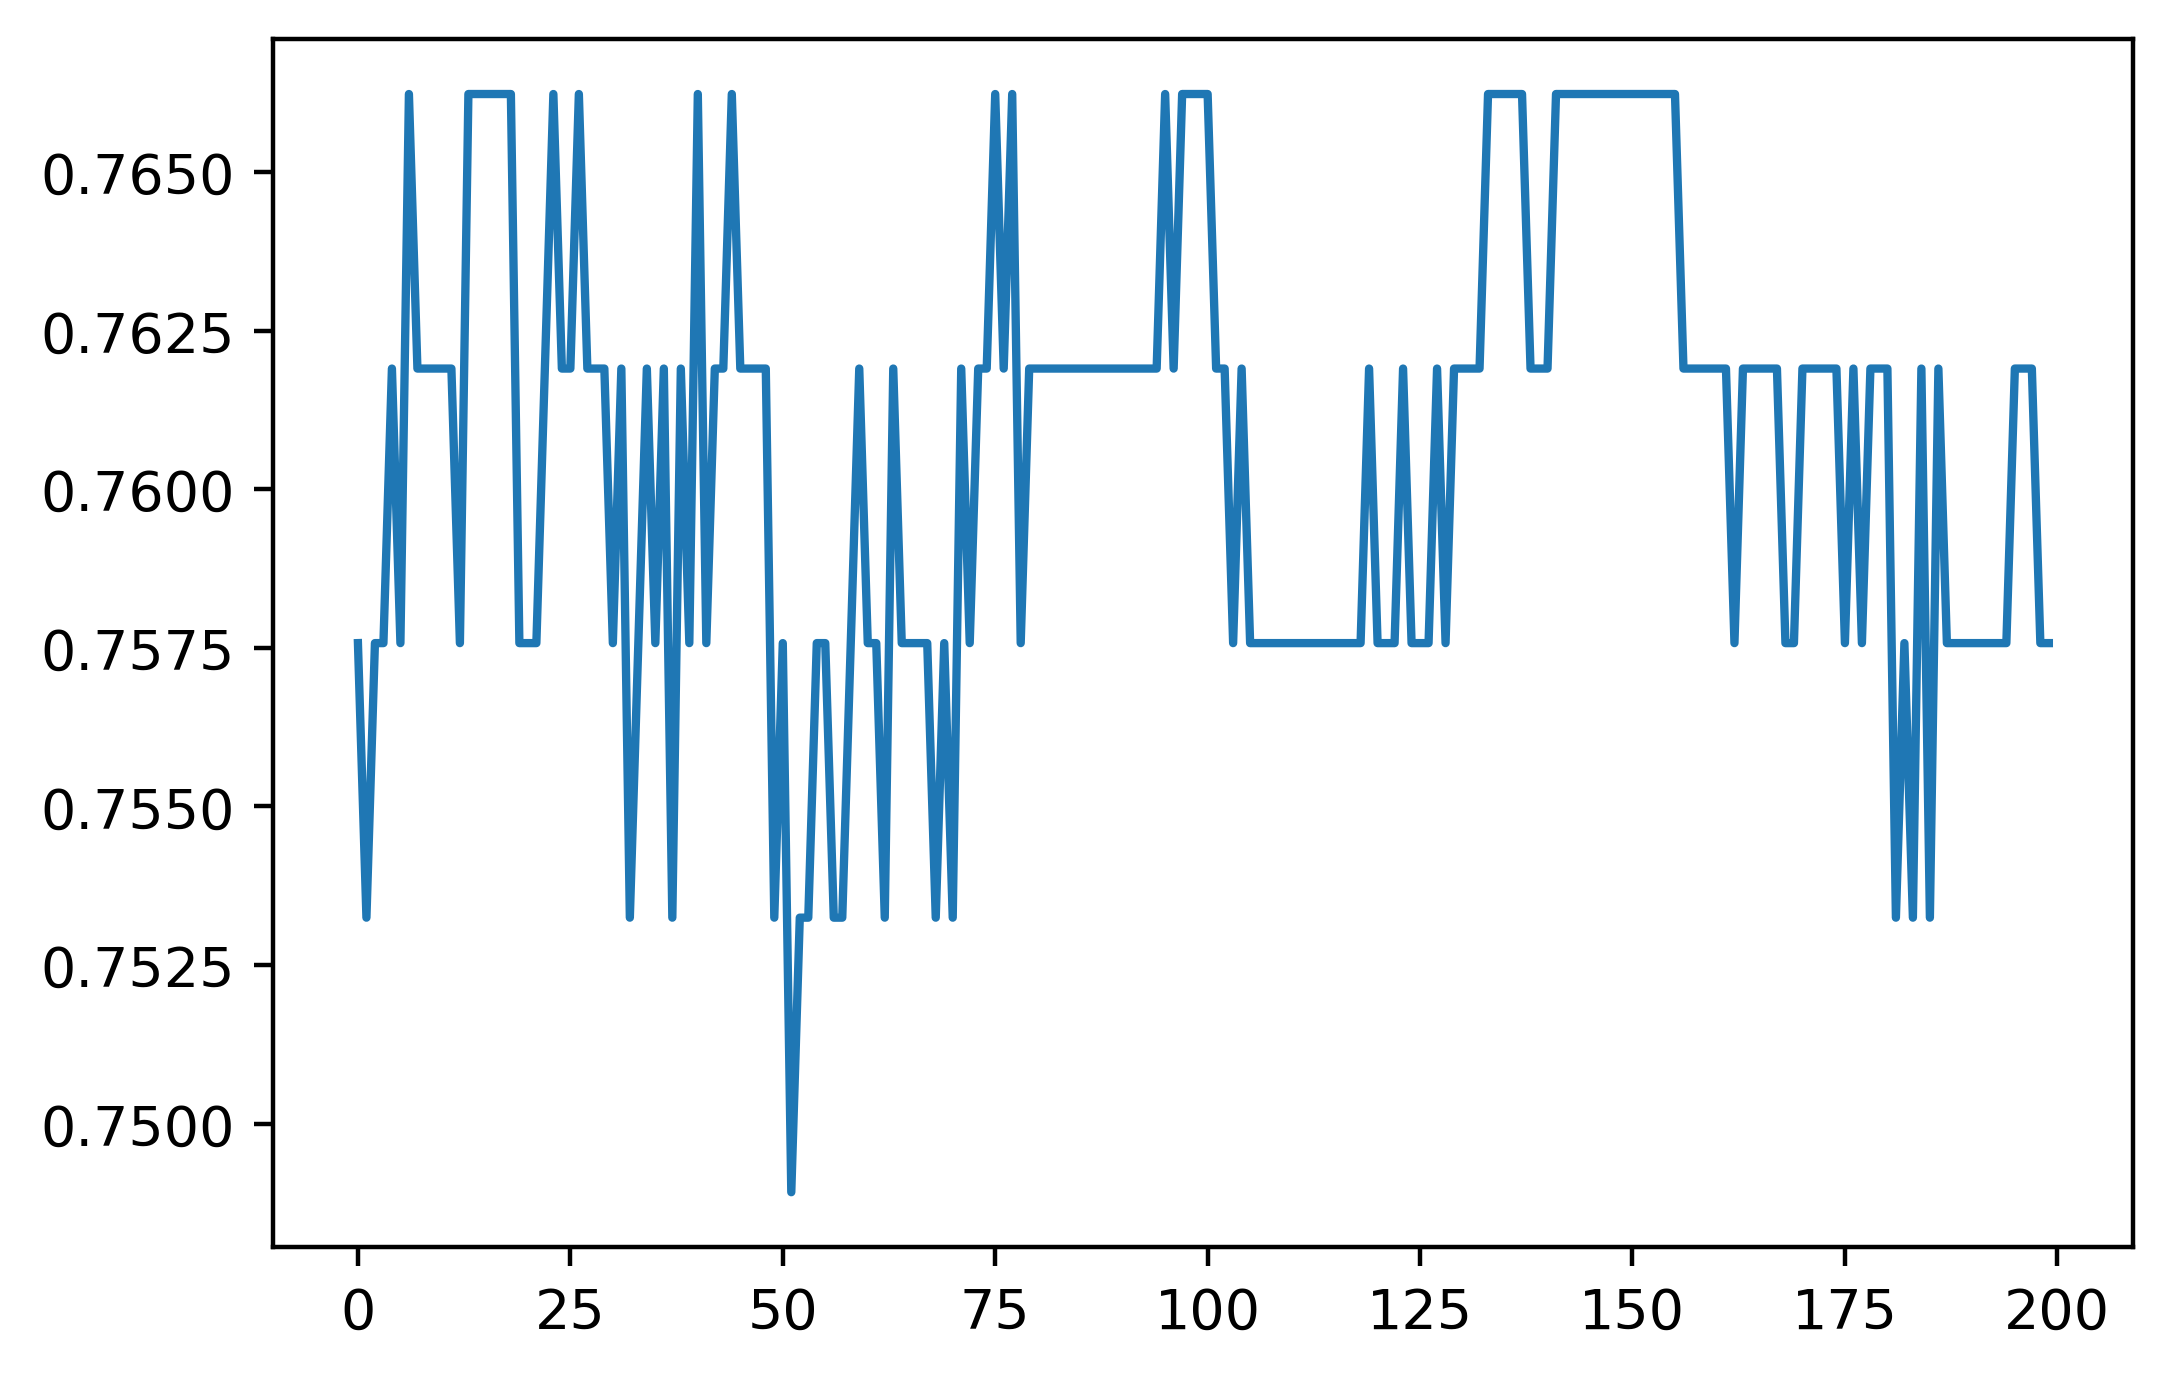

In [ ]:
plt.plot(acuracia_rf)

In [ ]:
max(acuracia_rf)

0.7662337662337663

# Fim (a busca nunca termina!)